In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

data = pd.read_csv('cloud-data/bus_data.csv')
data.head()

id  name                   type  calculatedCourse   routeName   created  \
0   4855  4131            Transit Bus        212.735226    LX Route  02:23 PM   
1   4859  4177            Transit Bus        128.232575    LX Route  02:23 PM   
2   4873  4191            Transit Bus        240.802514     B Route  02:23 PM   
3   4876  4194            Transit Bus        299.246496     B Route  02:23 PM   
4  17624  4002  Heavy Duty Transit LF        226.694476  REXB Route  02:23 PM   

   longitude   latitude  paxLoad  totalCap  more  tripId  deviceId  \
0 -74.433571  40.519749        0        67   101     NaN    402213   
1 -74.436304  40.524327       27        67   102     NaN    402325   
2 -74.457712  40.523463        8        67   101     NaN    402329   
3 -74.438946  40.521624        4        67   102     NaN    402330   
4 -74.438830  40.483538        2        68   102     NaN    402643   

   routeBlockId            timestamp  speed  
0        111417  2024-10-31 18:24:00    NaN  
1        111417  2024-10-31 18:24:00    NaN  
2        113278  2024-10-31 18:24:00    NaN  
3        113250  2024-10-31 18:24:00    NaN  
4        112511  2024-10-31 18:24:00    NaN

In [7]:
# convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
try:
    data.drop(['speed', 'outOfService', 'tripId', 'outdated'], axis=1, inplace=True)
except:
    data.drop(['speed', 'tripId'], axis=1, inplace=True)
data['load'] = data['paxLoad'] / data['totalCap']
# only use the latitude and longitude columns between certain values
data = data[(data['latitude'] > 40.4) & (data['latitude'] < 40.53)]
data = data[(data['longitude'] > -74.5) & (data['longitude'] < -74.3)]
data.head()

id  name                   type  calculatedCourse   routeName   created  \
0   4855  4131            Transit Bus        212.735226    LX Route  02:23 PM   
1   4859  4177            Transit Bus        128.232575    LX Route  02:23 PM   
2   4873  4191            Transit Bus        240.802514     B Route  02:23 PM   
3   4876  4194            Transit Bus        299.246496     B Route  02:23 PM   
4  17624  4002  Heavy Duty Transit LF        226.694476  REXB Route  02:23 PM   

   longitude   latitude  paxLoad  totalCap  more  deviceId  routeBlockId  \
0 -74.433571  40.519749        0        67   101    402213        111417   
1 -74.436304  40.524327       27        67   102    402325        111417   
2 -74.457712  40.523463        8        67   101    402329        113278   
3 -74.438946  40.521624        4        67   102    402330        113250   
4 -74.438830  40.483538        2        68   102    402643        112511   

            timestamp      load  
0 2024-10-31 18:24:00  0.000000  
1 2024-10-31 18:24:00  0.402985  
2 2024-10-31 18:24:00  0.119403  
3 2024-10-31 18:24:00  0.059701  
4 2024-10-31 18:24:00  0.029412

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\3465549065.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['load'])


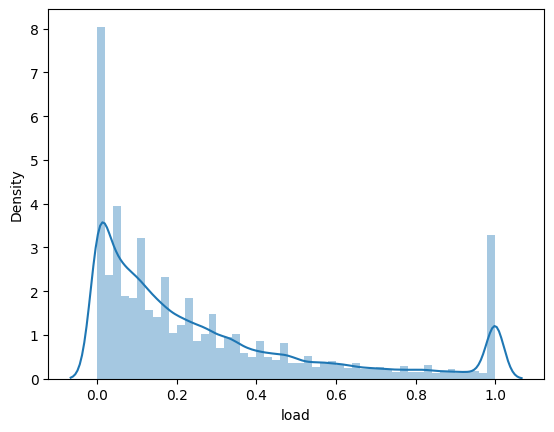

In [8]:
# plot the distribution of the load
sns.distplot(data['load'])
plt.show()

In [9]:
data.describe()

id           name  calculatedCourse      longitude  \
count  399628.000000  399628.000000     399628.000000  399628.000000   
mean     9565.211739    3307.832304        179.039311     -74.447655   
min      4839.000000     127.000000          0.000000     -74.466677   
25%      4874.000000    4002.000000        102.764289     -74.456276   
50%      7179.000000    4110.000000        159.370120     -74.447971   
75%     13217.000000    4190.000000        278.493370     -74.438401   
max     18021.000000    4910.000000        359.996661     -74.428583   
std      5009.166109    1556.983842         98.432650       0.009867   

            latitude        paxLoad       totalCap          more  \
count  399628.000000  399628.000000  399628.000000  399628.00000   
mean       40.508068      17.752139      65.615047     101.25503   
min        40.478865       0.000000      30.000000      11.00000   
25%        40.499141       3.000000      67.000000     101.00000   
50%        40.506826      11.000000      67.000000     102.00000   
75%        40.523542      25.000000      67.000000     102.00000   
max        40.526545      80.000000      80.000000     105.00000   
std         0.015216      19.329839       7.976636       5.42775   

            deviceId   routeBlockId                      timestamp  \
count  399628.000000  399628.000000                         399628   
mean   414279.467220  107670.394114  2024-11-04 17:08:04.921404416   
min    402213.000000    5450.000000            2024-10-31 18:24:00   
25%    402709.000000  111420.000000            2024-11-02 00:47:06   
50%    411189.000000  111610.000000            2024-11-05 02:23:08   
75%    422712.000000  112513.000000            2024-11-06 16:29:28   
max    441428.000000  117898.000000            2024-11-07 21:51:49   
std     12065.619209   17892.536776                            NaN   

                load  
count  399628.000000  
mean        0.271459  
min         0.000000  
25%         0.053333  
50%         0.164179  
75%         0.388060  
max         1.000000  
std         0.290512

In [10]:
# print the unique values of deviceId
print(data['deviceId'].unique())

[402213 402325 402329 402330 402643 402645 402694 402696 402698 402699
 402702 402708 402709 402720 402723 402727 402729 402741 402867 405190
 405378 405382 405404 406275 411181 411187 411189 411194 415102 415104
 415105 417554 417555 417562 422692 422694 422698 422700 422708 422712
 428735 429476 429478 429482 429484 441420 441424 441426 405380 417553
 402733 402215 422714 417557 402707 402695 441418 402739 402646 402647
 441428 441422]


In [11]:
# print the unique values of routeBlockId
print(data['routeBlockId'].unique())

[111417 113278 113250 112511 111413 111418 111416 113248 111580 112513
 111532 111677 111679 111639 111601 111531 117896 113249 111422 117897
 111602 111680 111642 111579 117895 111421 111533 111678 111641 111640
 112512 111420 111411 111535 113246 111423 112747 111329 111582 111676
   5451 111534 112510 111419 113245 111581 111603 117898 113251 113252
 111644 111643 112514 112515 111681 112516 111682 111425 111683 111424
 111340 111426 111646 111605 111604 111645 111427 111341 111428 111606
 111648 111647 111429 111684 111538 111609 117892 112518 111685 111539
 117891 111430 113254 111649 111540 113253 111686 117893 113255 117894
 111610 111608 112519 111431   5452 111432 111607 111650 111433 111687
 113256 111541 111611 111542 111435 111688 111613 111612   5453 111614
 111434 111652 111543 112725 111544 113258 111615 111545 111616 111653
 111536 111689 113257 111436 113259 112520 112521 111651 111342 112723
 111617 111655 112724 111618 111654  70470  70455  70471  70456  70457
  7047

In [12]:
# for each unique routeBlockId, print the average value of latitude and longitude as well as load
for routeBlockId in data['routeBlockId'].unique():
    print(routeBlockId)
    print(data[data['routeBlockId'] == routeBlockId].mean())
    print()

111417


TypeError: can only concatenate str (not "int") to str

In [13]:
# get the average latitude and longitude for each routeBlockId
# plot the location of each routeBlockId
locations = data.groupby('routeBlockId').mean()
locations = locations[['latitude', 'longitude']]
locations.reset_index(inplace=True)

m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=15)
mc = MarkerCluster()
for idx, row in locations.iterrows():
    mc.add_child(folium.Marker(location=[row['latitude'], row['longitude']], tooltip=row['routeBlockId']))
m.add_child(mc)
m.save('maps/map.html')

TypeError: agg function failed [how->mean,dtype->object]

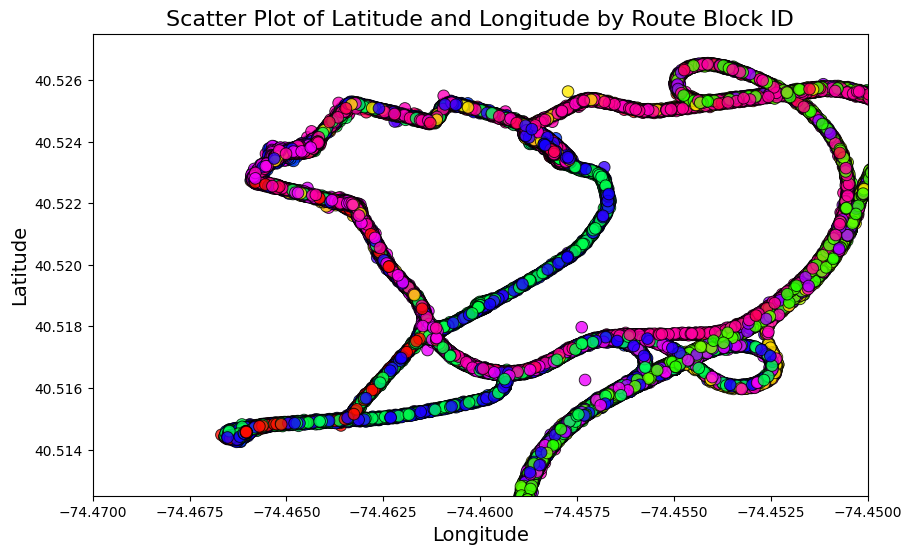

In [14]:
# Determine a color palette that adapts to the unique number of routeBlockId values
unique_route_blocks = data['routeBlockId'].nunique()
palette = sns.color_palette("hsv", unique_route_blocks)

# Create scatter plot with routeBlockId as hue and customized color palette
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=data, 
    x='longitude', 
    y='latitude', 
    hue='routeBlockId', 
    palette=palette, 
    s=70, 
    edgecolor='k', 
    alpha=0.8,
    legend=False
)

# Add titles and labels for better readability
plt.title("Scatter Plot of Latitude and Longitude by Route Block ID", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

# Set plot limits
plt.ylim(40.5125, 40.5275)
plt.xlim(-74.47, -74.45)

# Display legend outside the plot
# plt.legend(title="Route Block ID", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx

# Determine a color palette that adapts to the unique number of routeBlockId values
unique_route_blocks = data['routeBlockId'].nunique()
palette = sns.color_palette("hsv", unique_route_blocks)

# Create scatter plot with routeBlockId as hue and customized color palette
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=data, 
    x='longitude', 
    y='latitude', 
    hue='routeBlockId', 
    palette=palette, 
    s=70, 
    edgecolor='k', 
    alpha=0.8,
    legend=False
)

# Add titles and labels for better readability
plt.title("Scatter Plot of Latitude and Longitude by Route Block ID", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

# Set plot limits
plt.ylim(40.5125, 40.5275)
plt.xlim(-74.47, -74.45)

# Add the map background with contextily
# Note: contextily expects coordinates in Web Mercator format
scatter_plot = scatter.get_figure()
scatter_plot.axes[0].set_xlim(-8282490, -8279740)
scatter_plot.axes[0].set_ylim(4964920, 4966700)

# Add a basemap; use crs="EPSG:3857" for Web Mercator
ctx.add_basemap(scatter_plot.axes[0], crs="EPSG:3857", source=ctx.providers.Stamen.TonerLite)

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'contextily'

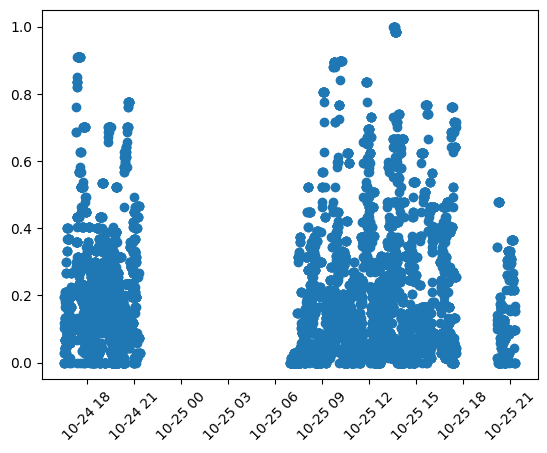

In [ ]:
# get a specific route and plot the scatter plot of load over time
route = 'A Route'
data_route = data[data['routeName'] == route]
plt.scatter(data_route['timestamp'], data_route['load'])
# make the x axis more readable
plt.xticks(rotation=45)
plt.show()

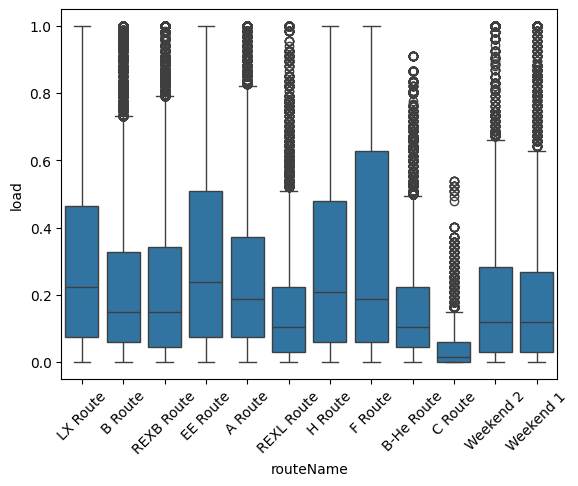

In [16]:
# plot the distribution of load for each route
sns.boxplot(x='routeName', y='load', data=data)
plt.xticks(rotation=45)
plt.show()

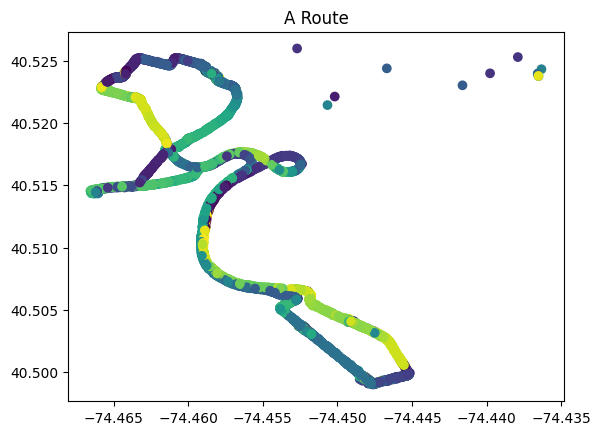

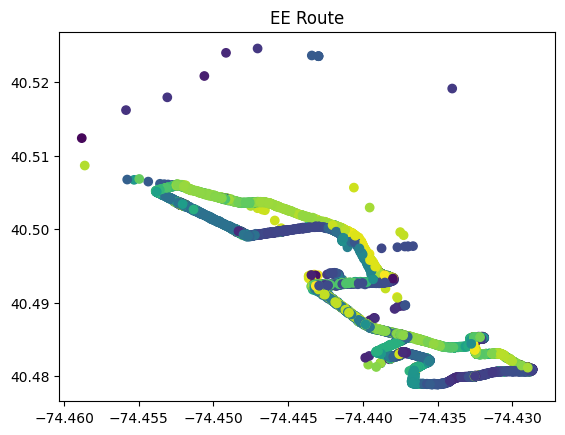

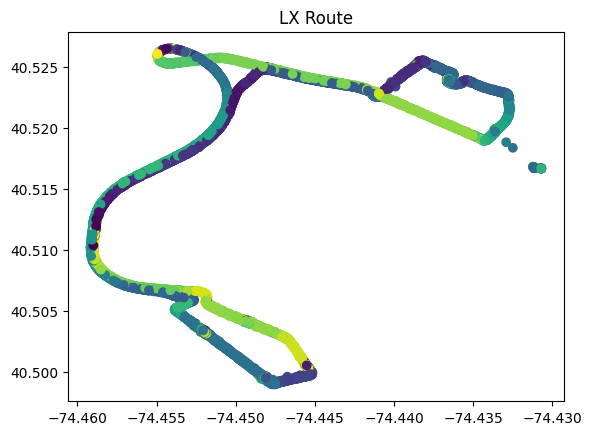

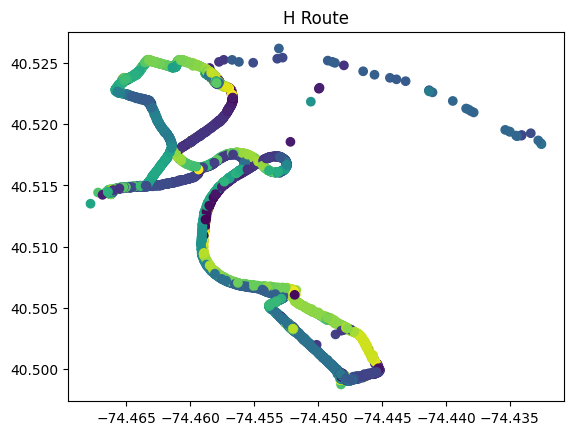

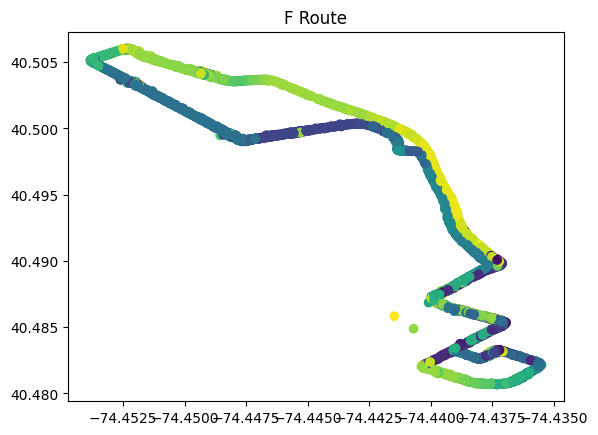

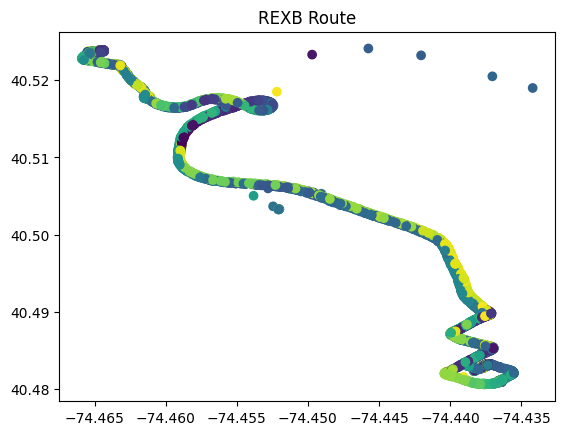

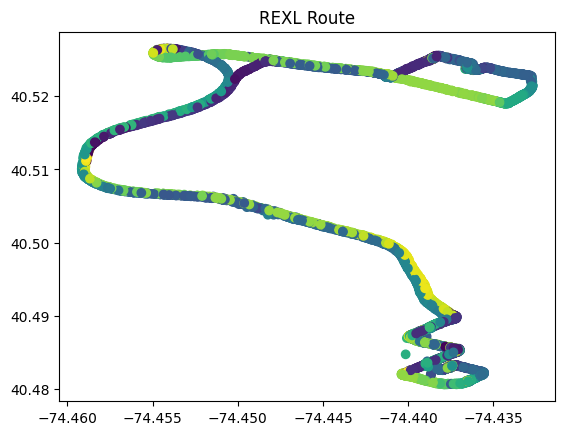

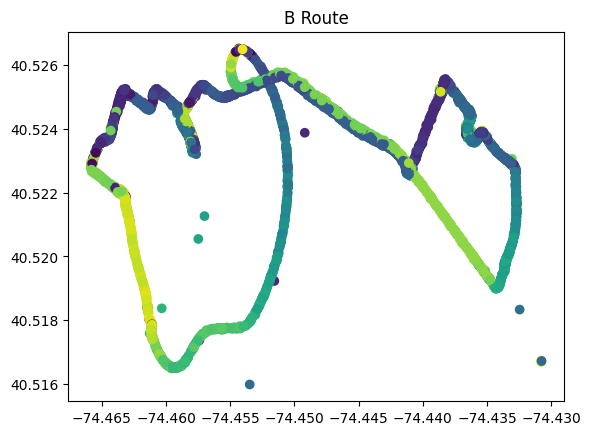

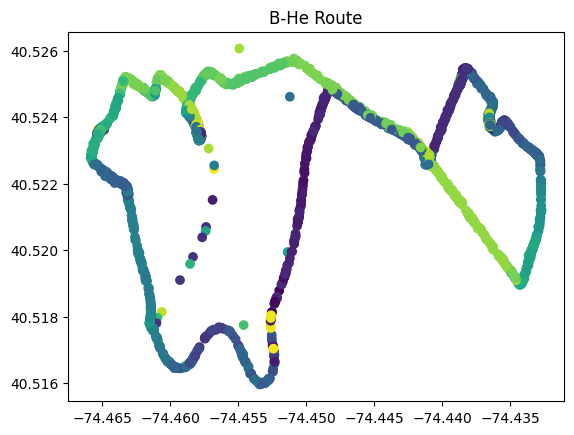

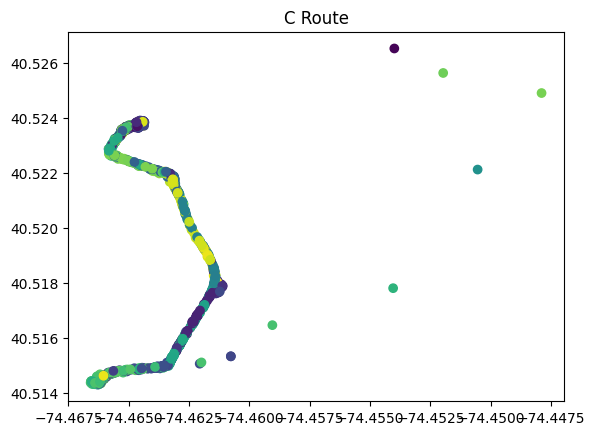

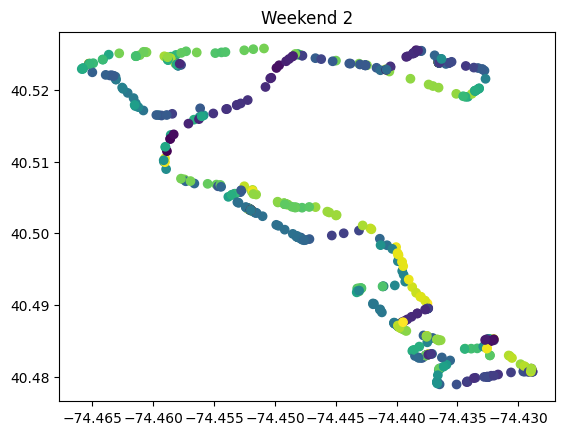

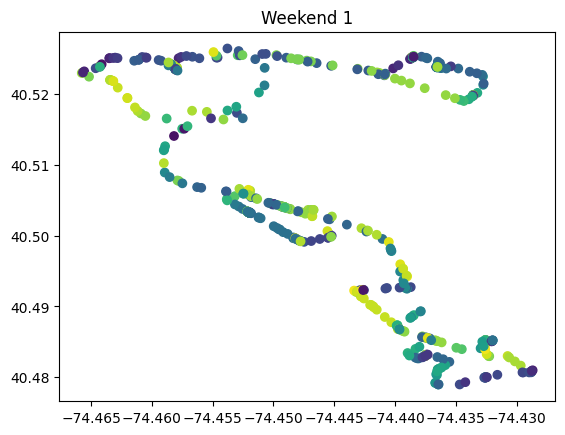

In [ ]:
# make a heat map with the longitude and latitude data for each route
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]
    plt.scatter(data_route['longitude'], data_route['latitude'], c=data_route['calculatedCourse'])
    plt.title(route)
    plt.show()

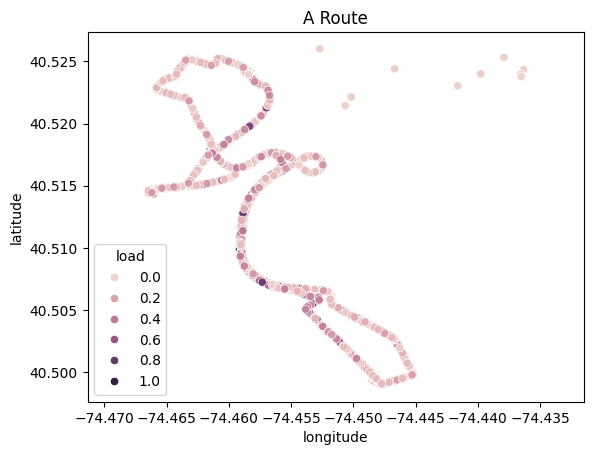

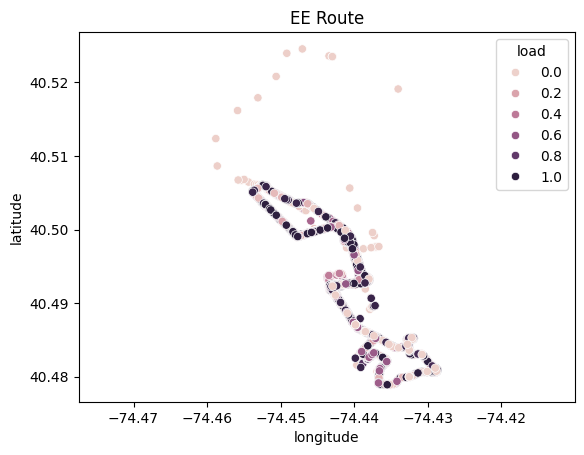

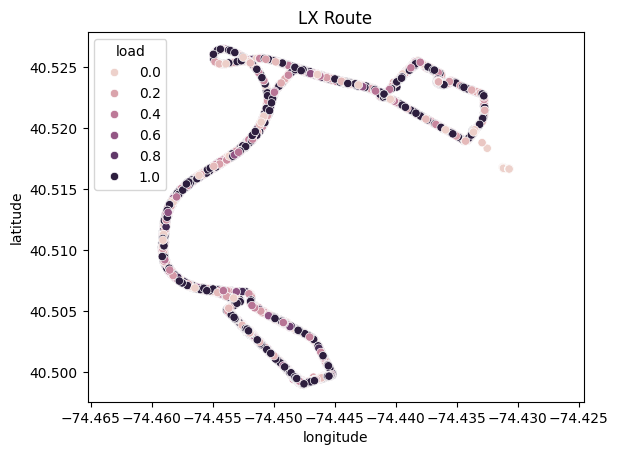

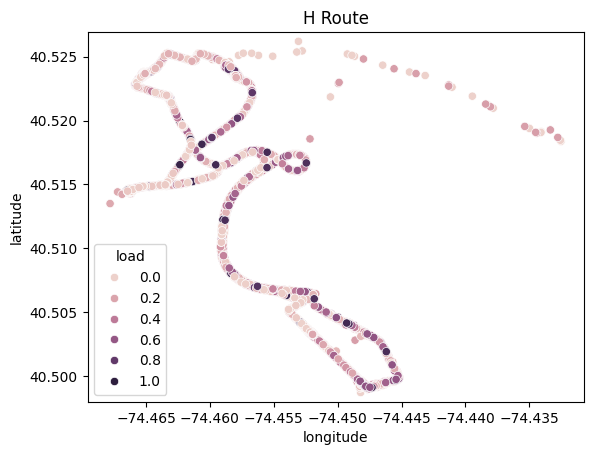

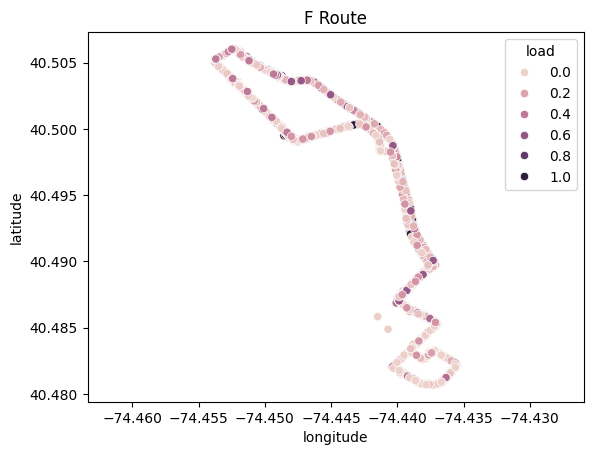

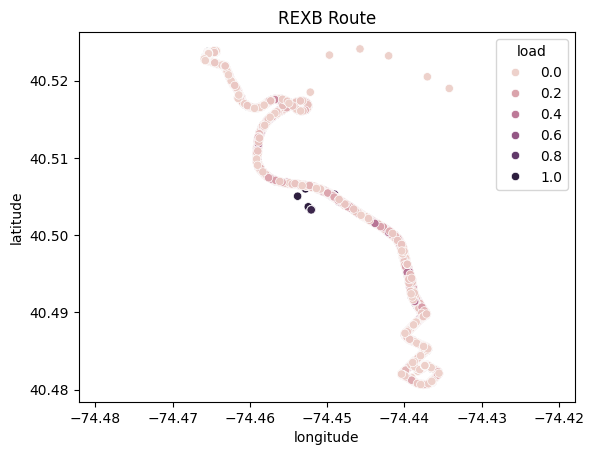

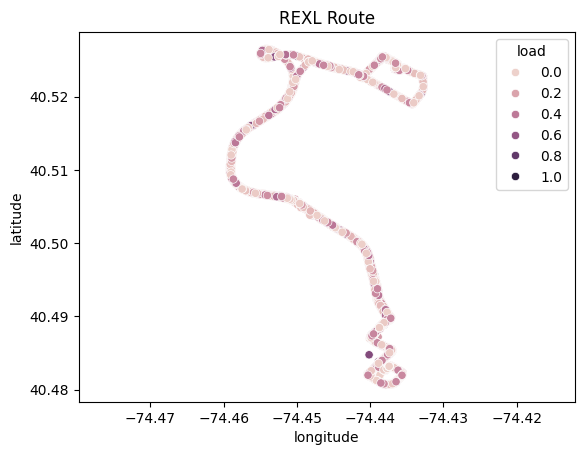

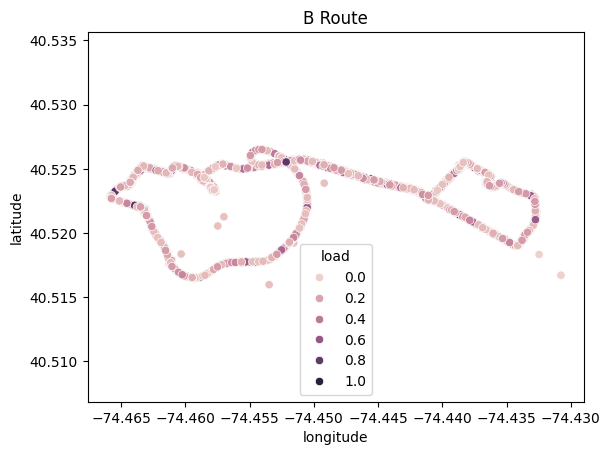

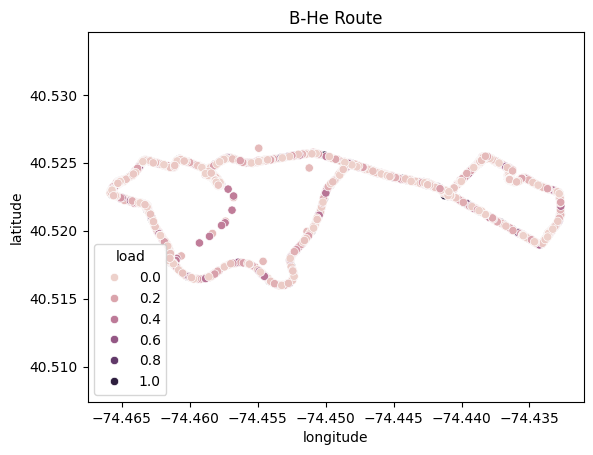

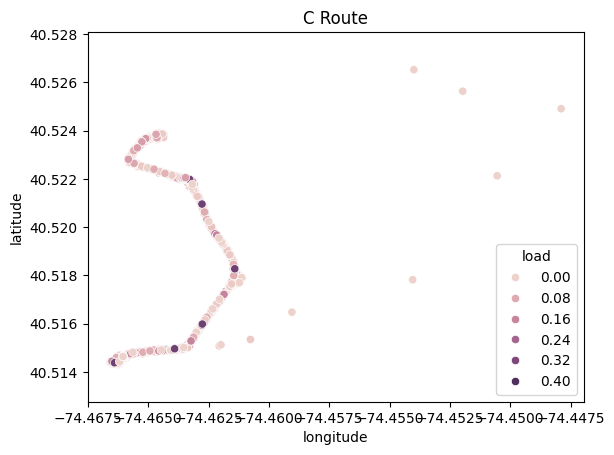

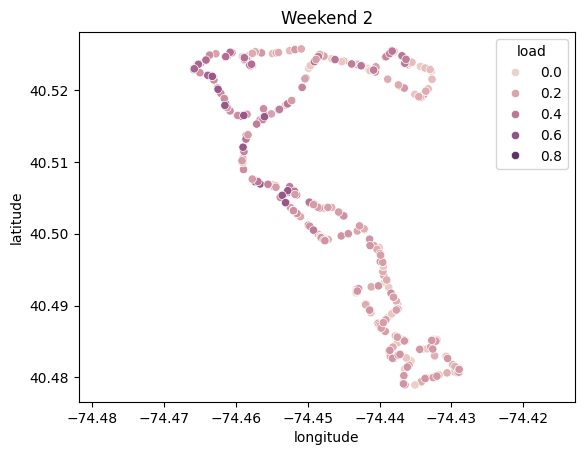

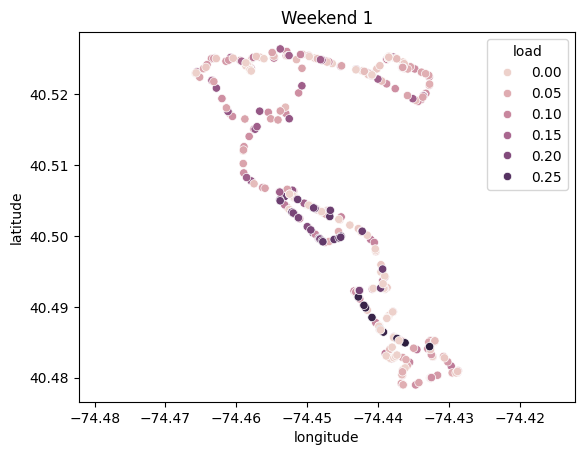

In [ ]:
# plot the scatter plot of longitude and latitude for each route as well as hue for the load
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]
    sns.scatterplot(x='longitude', y='latitude', hue='load', data=data_route)
    plt.title(route)

    # make it so that the x and y scale is the same
    plt.axis('equal')
    plt.show()

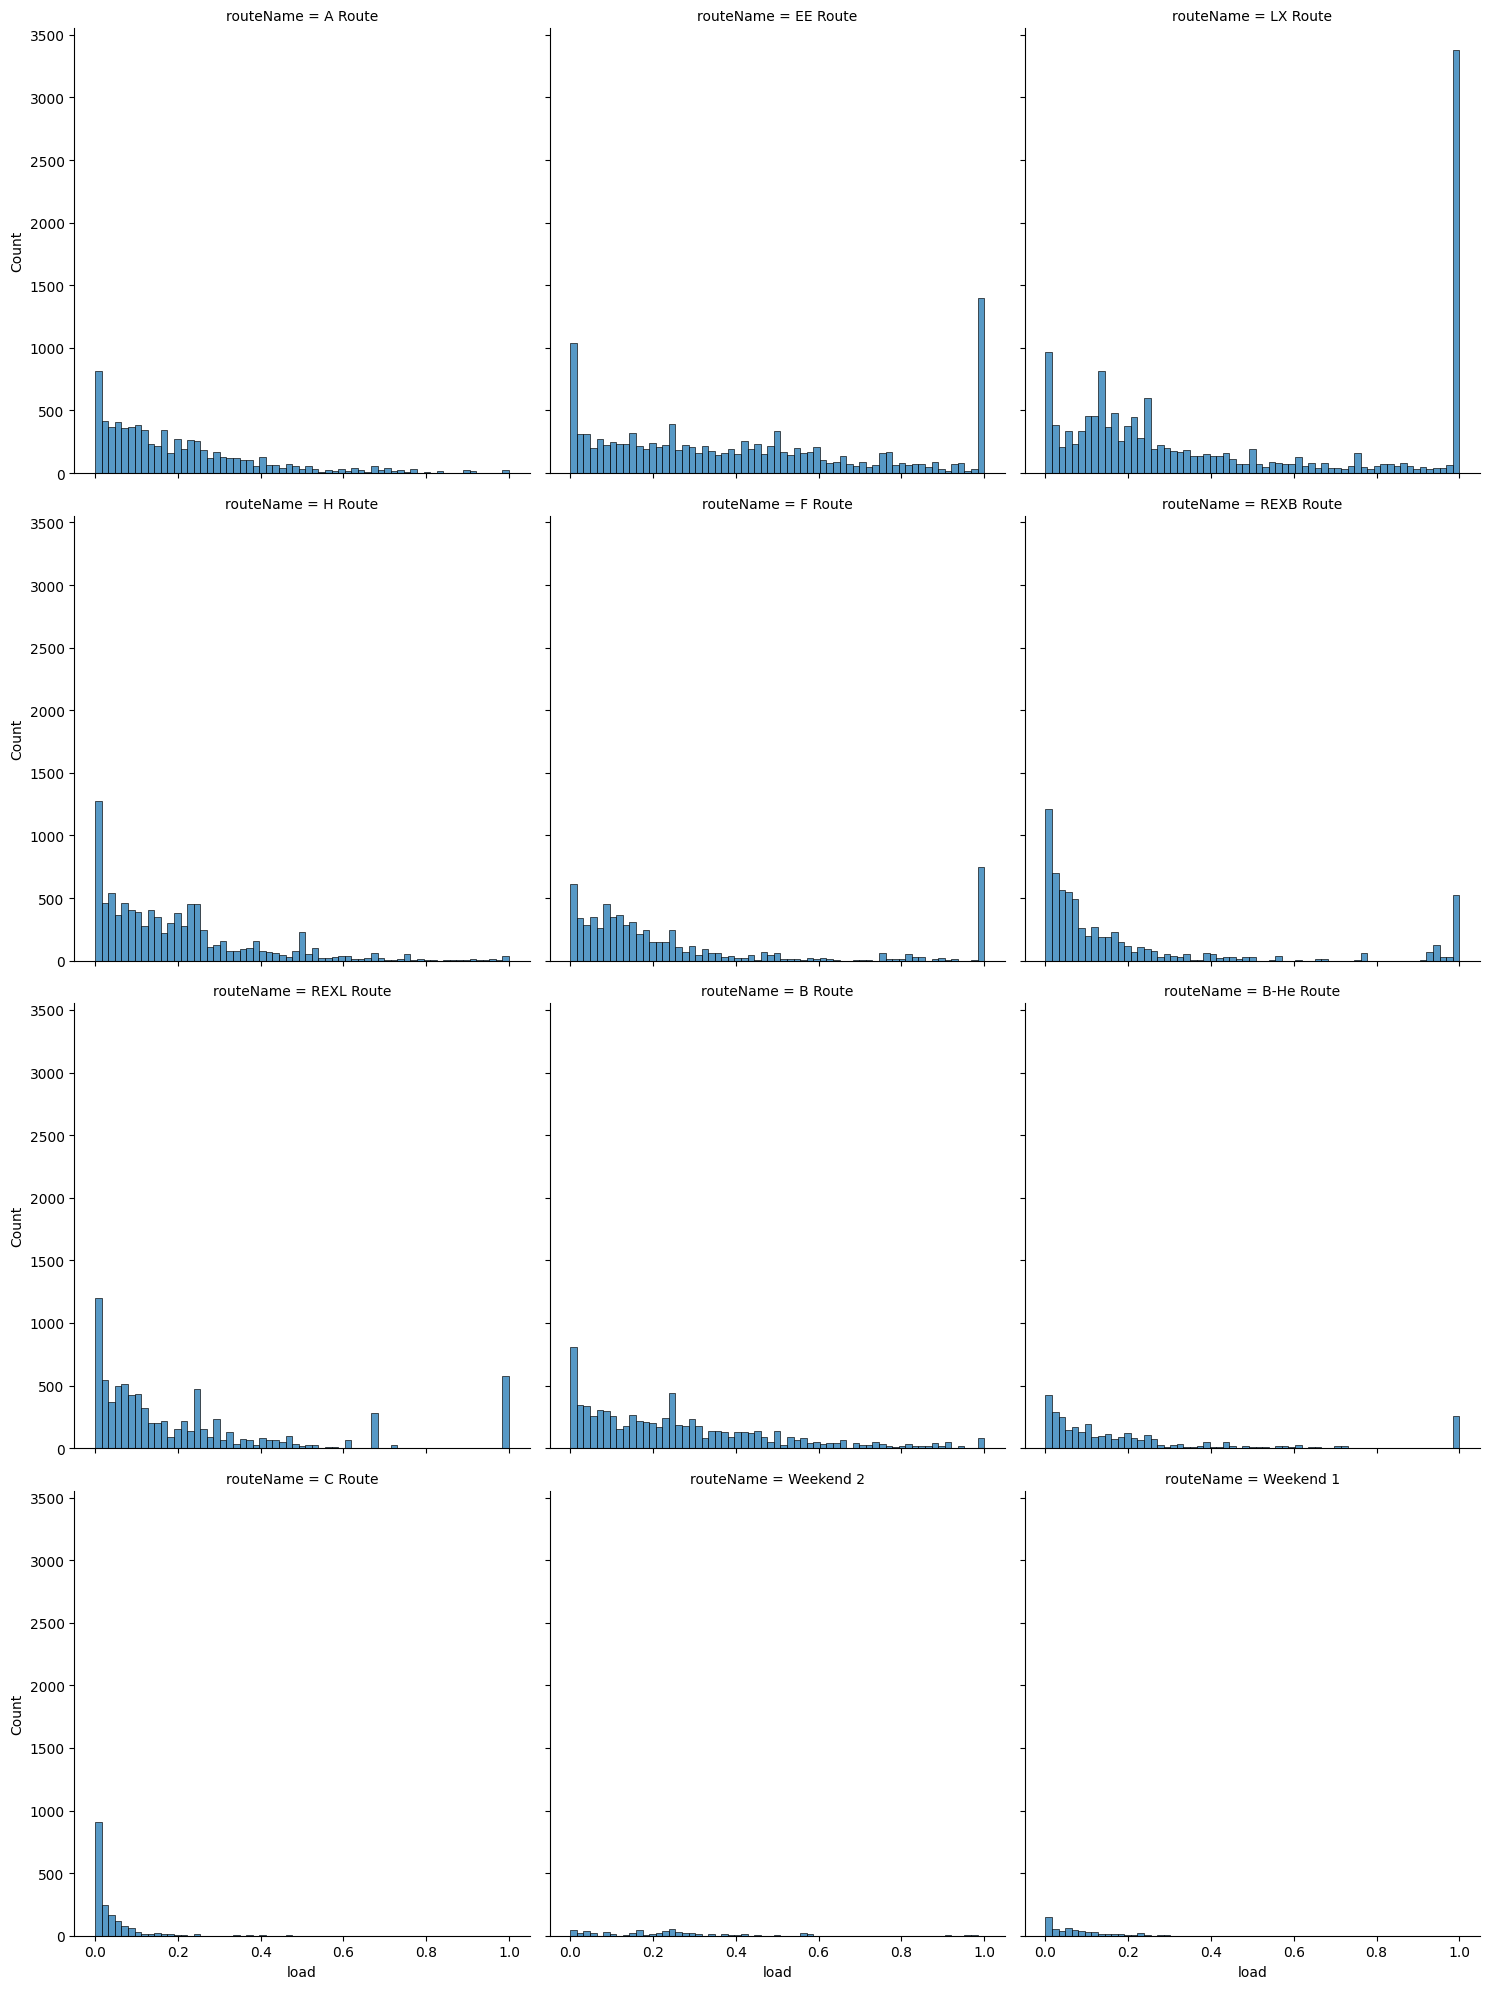

In [ ]:
# graph the distribution of more
sns.displot(data, x='load', col='routeName', col_wrap=3)
plt.show()

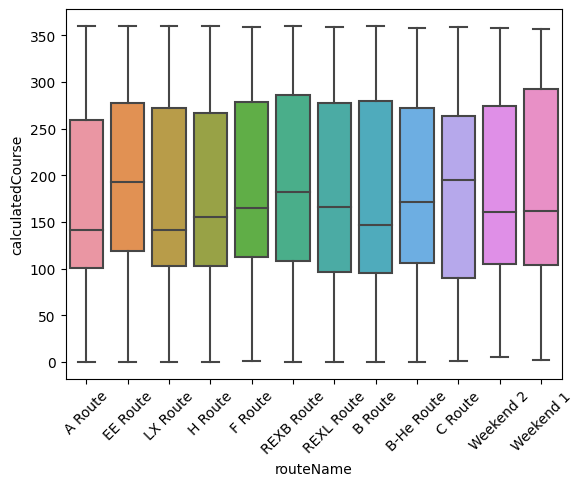

In [ ]:
# plot the distribution of calc course for each route
sns.boxplot(x='routeName', y='calculatedCourse', data=data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
for route in data['routeName'].unique():
    data_route = data[data['routeName'] == route]

    # Initialize map at an approximate central location of your data
    map_route = folium.Map(
        location=[data_route['latitude'].mean(), data_route['longitude'].mean()],
        zoom_start=12
    )

    # Add points with MarkerCluster for better visualization
    marker_cluster = MarkerCluster().add_to(map_route)
    for _, row in data_route.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color="blue" if row['load'] < 0.3 else "red",  # Adjust color based on load threshold
            fill=True,
            fill_opacity=0.7
        ).add_to(marker_cluster)

    # Show or save the map
    map_route.save(f"maps/{route}_map.html")  # Save as HTML file
    map_route


C:\Users\akash\AppData\Local\Temp\ipykernel_22952\2889258366.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='timestamp', y='load', data=data_route, palette='tab10')


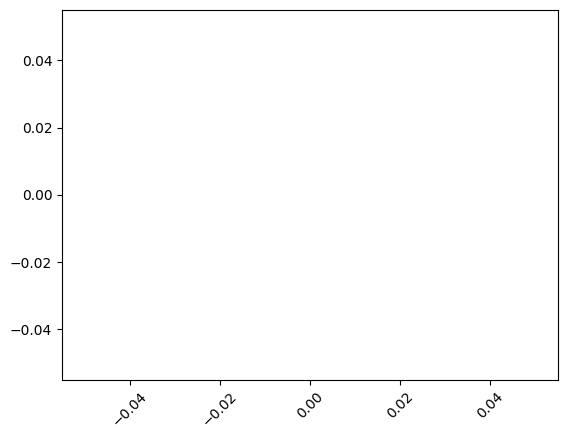

In [ ]:
# get a specific route and plot the scatter plot of load over time
route = 'Weekend 1'
data_route = data[data['routeName'] == route]

# get the time values between two times
start_time = pd.Timestamp('2024-10-31 12:00:00')
end_time = pd.Timestamp('2024-11-04 19:30:00')

data_route = data_route[(data_route['timestamp'] > start_time) & (data_route['timestamp'] < end_time)]

# at each distinct timestamp, get the average load
data_route = data_route.groupby('timestamp').mean().reset_index()

# add a hue for each device id
sns.scatterplot(x='timestamp', y='load', data=data_route, palette='tab10')

plt.xticks(rotation=45)
plt.show()

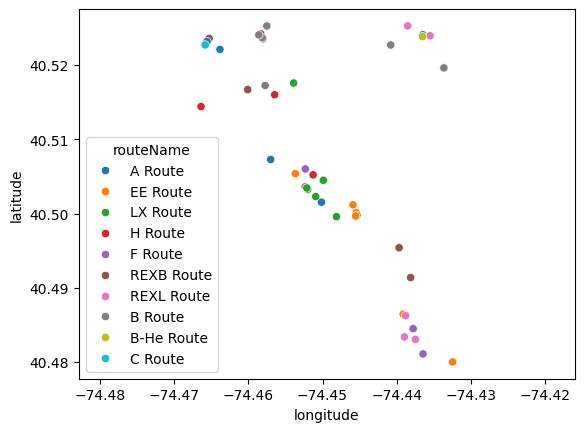

In [ ]:
times = data['timestamp'].unique()

time = times[0]

# plot the location of the buses at a specific time
data_time = data[data['timestamp'] == time]

# create a scatter plot with the hue as the route name
sns.scatterplot(x='longitude', y='latitude', hue='routeName', data=data_time)
# make the x and y scale the same
plt.axis('equal')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_12548\4174053210.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('temp.png'))
C:\Users\akash\AppData\Local\Temp\ipykernel_12548\4174053210.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('temp.png'))
C:\Users\akash\AppData\Local\Temp\ipykernel_12548\4174053210.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio`

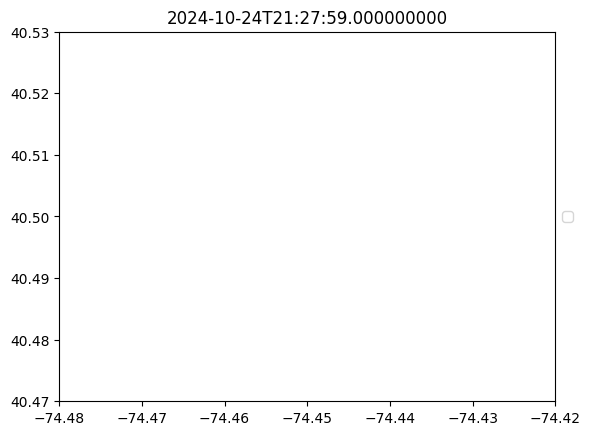

In [ ]:
# make a video of the buses over time
import imageio

images = []

bus_id = data['deviceId'].unique()[0]
bus_data = data[data['deviceId'] == bus_id]

try:
    for time in times:
        data_time = bus_data[bus_data['timestamp'] == time]

        plt.figure()
        sns.scatterplot(x='longitude', y='latitude', hue='routeName', data=data_time)
        plt.ylim(40.47, 40.53)
        plt.xlim(-74.48, -74.42)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(time)
        plt.savefig('temp.png')
        images.append(imageio.imread('temp.png'))
        plt.close()

except KeyboardInterrupt:
    pass

imageio.mimsave('buses.gif', images, duration=0.1)

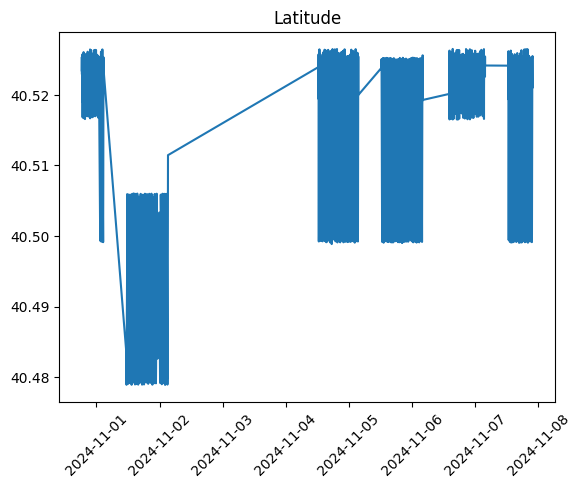

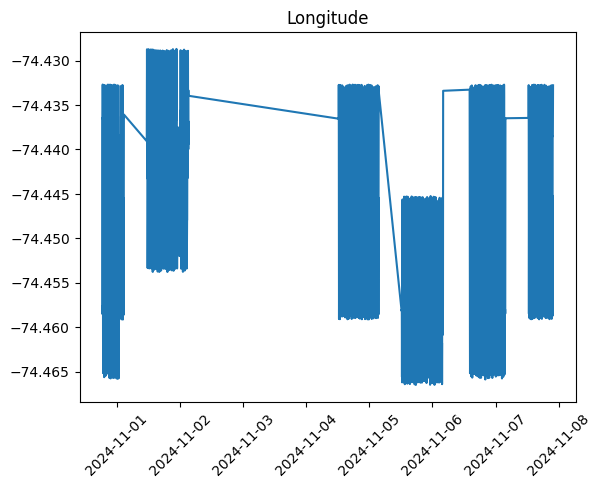

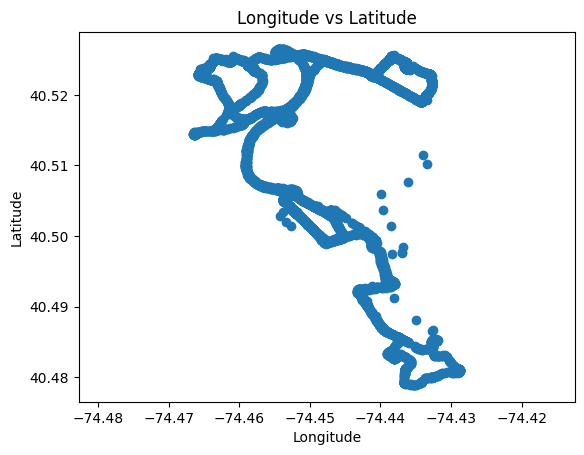

In [17]:
# pick a bus on its route and plot its latitute and longitude for a certain number of observations
bus_id = data['id'].unique()[2]

ROWS = 10000

data_bus = data[data['id'] == bus_id]
data_bus = data_bus.head(ROWS)

# make a line plot for the latitude and longitude
plt.plot(data_bus['timestamp'], data_bus['latitude'])
plt.title('Latitude')
plt.xticks(rotation=45)
plt.show()

plt.plot(data_bus['timestamp'], data_bus['longitude'])
plt.title('Longitude')
plt.xticks(rotation=45)
plt.show()

plt.scatter(data_bus['longitude'], data_bus['latitude'])
plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [ ]:
# You can then use these points for plotting or other operations
# For example, plot the interpolated points on a map using folium:
m = folium.Map(location=[data_bus['latitude'].mean(), data_bus['longitude'].mean()], zoom_start=13)
# for row in data_bus make a point for it
for index, row in data_bus.iterrows():
    folium.Marker([row['latitude'], row['longitude']], radius=2, color='blue', fill=True, fill_color='blue').add_to(m)

m

In [ ]:
data.describe()

id          name  calculatedCourse     longitude  \
count  79712.000000  79712.000000      79712.000000  79712.000000   
mean    9417.224809   3211.250640        179.198192    -74.447872   
std     4621.225395   1606.324416         97.338536      0.010100   
min     4839.000000    127.000000          0.018745    -74.518140   
25%     4877.000000   3260.000000        103.873008    -74.457162   
50%     7181.000000   4038.000000        163.303638    -74.448140   
75%    13214.000000   4190.000000        273.814075    -74.438483   
max    17626.000000   4910.000000        359.970812    -74.186618   

           latitude       paxLoad      totalCap          more       deviceId  \
count  79712.000000  79712.000000  79712.000000  79712.000000   79712.000000   
mean      40.507767     19.590890     66.961875    101.495559  412956.294184   
std        0.015318     21.328391      7.079388      3.564675    9943.352184   
min       40.412717      0.000000     30.000000     11.000000  402213.000000   
25%       40.497621      4.000000     67.000000    101.000000  402720.000000   
50%       40.506680     12.000000     67.000000    102.000000  411189.000000   
75%       40.523497     27.000000     67.000000    102.000000  422698.000000   
max       40.739773     80.000000     80.000000    105.000000  429484.000000   

        routeBlockId          load  
count   79712.000000  79712.000000  
mean   109477.977381      0.289753  
std     16420.335250      0.303032  
min      5451.000000      0.000000  
25%    111533.000000      0.059701  
50%    111644.000000      0.179104  
75%    112517.000000      0.402985  
max    117898.000000      1.000000

In [ ]:
bus_id = 4855
data_bus = data[data['id'] == bus_id]
data_bus = data_bus.sort_values('timestamp')
data_bus.head()

id  name         type  calculatedCourse routeName   created  longitude  \
0    4855  4131  Transit Bus        135.131827   A Route  04:32 PM -74.450146   
48   4855  4131  Transit Bus        133.766005   A Route  04:32 PM -74.448791   
96   4855  4131  Transit Bus        136.339422   A Route  04:33 PM -74.448129   
144  4855  4131  Transit Bus         82.525166   A Route  04:33 PM -74.448071   
192  4855  4131  Transit Bus        133.584599   A Route  04:34 PM -74.447733   

      latitude  paxLoad  totalCap  more  deviceId  routeBlockId  \
0    40.501523        0        67   102    402213        111533   
48   40.500219        0        67   102    402213        111533   
96   40.499526        0        67   101    402213        111533   
144  40.499533        3        67   101    402213        111533   
192  40.499235        3        67   101    402213        111533   

              timestamp      load  
0   2024-10-24 16:32:24  0.000000  
48  2024-10-24 16:32:55  0.000000  
96  2024-10-24 16:33:25  0.000000  
144 2024-10-24 16:33:55  0.044776  
192 2024-10-24 16:34:25  0.044776

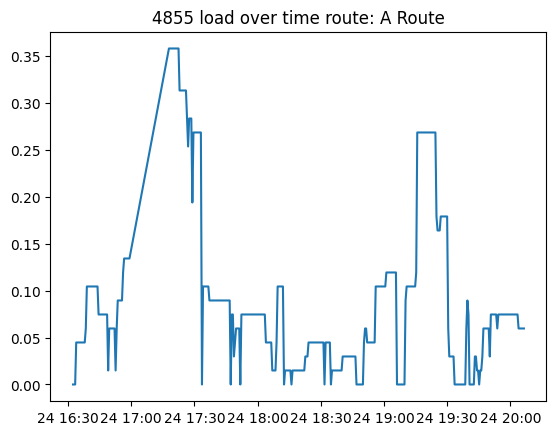

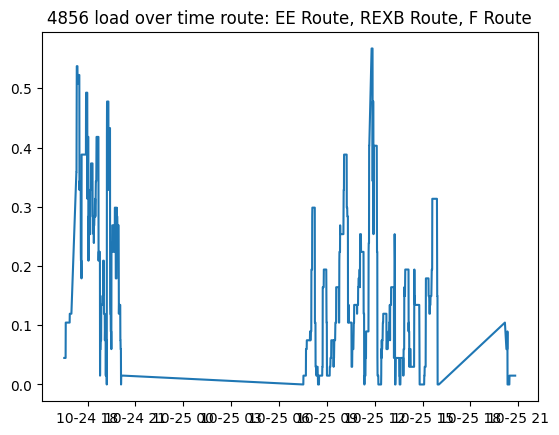

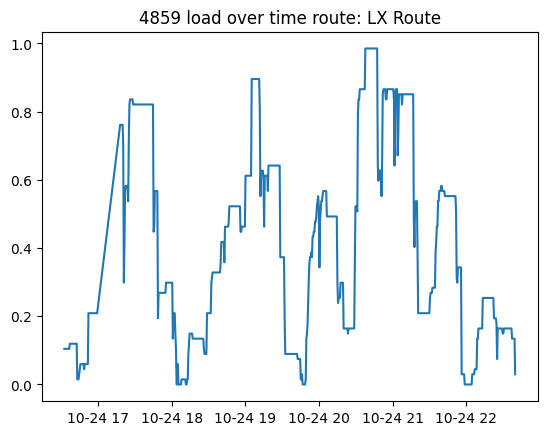

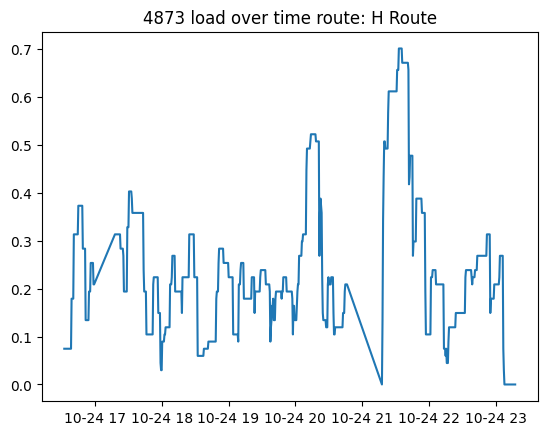

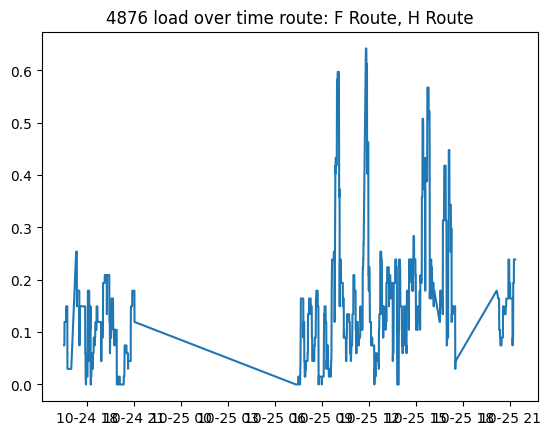

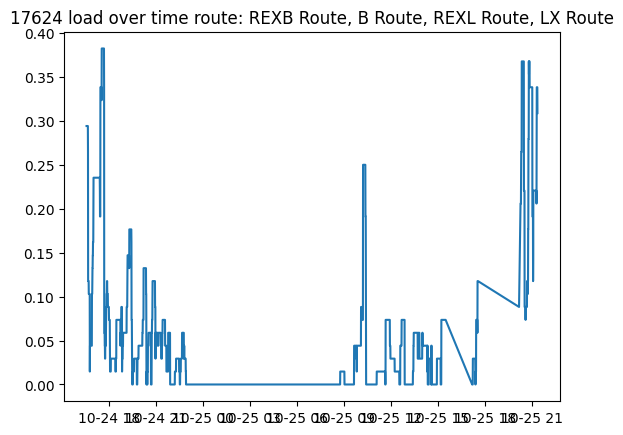

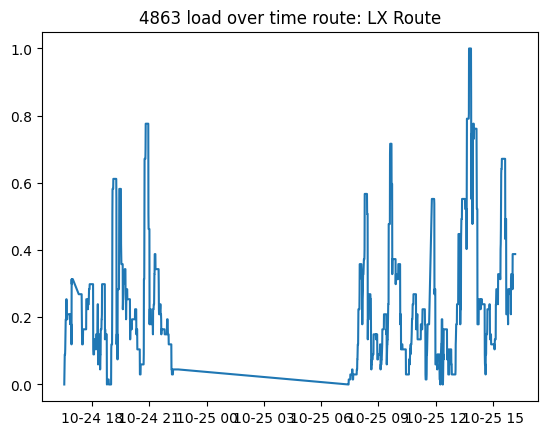

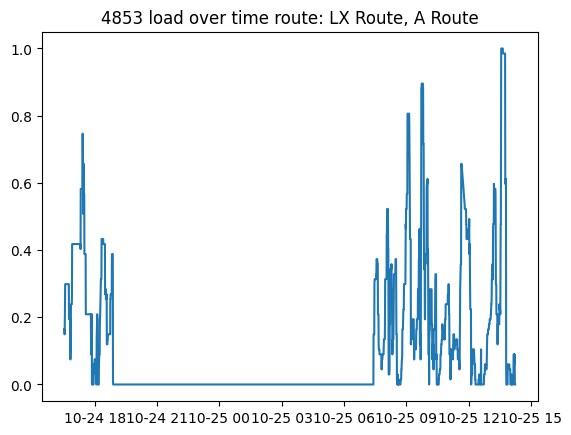

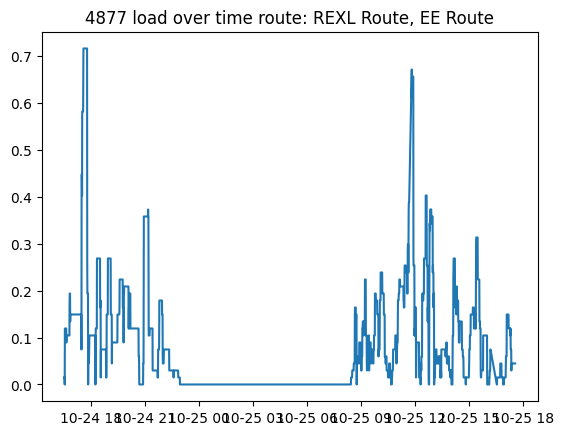

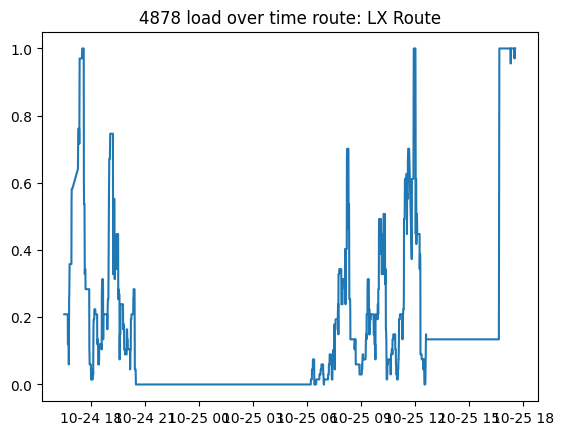

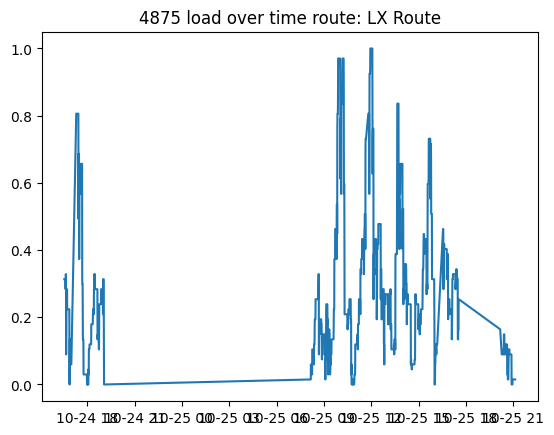

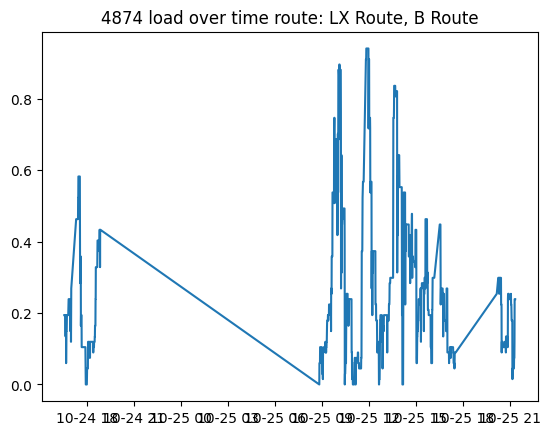

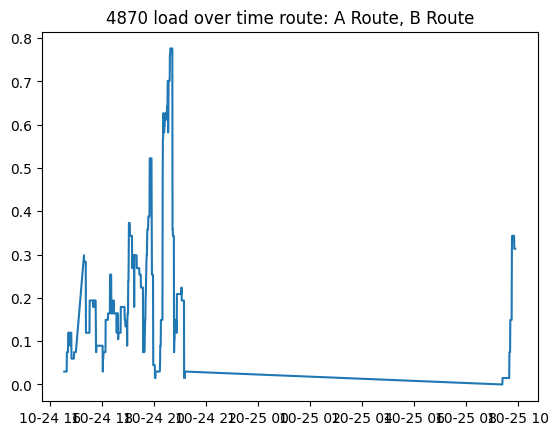

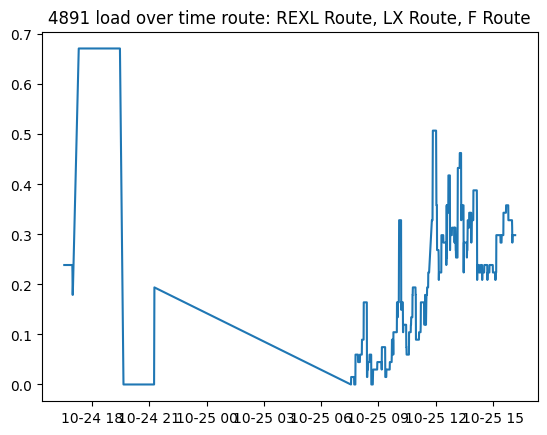

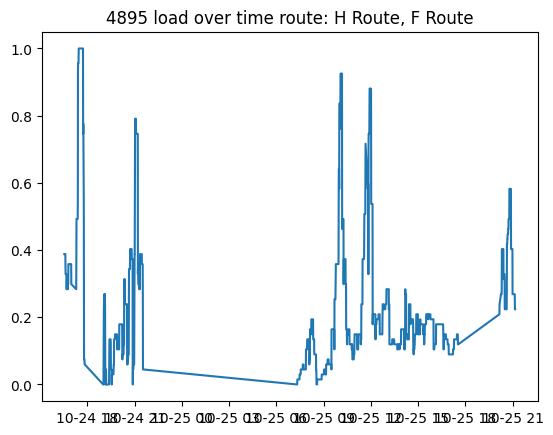

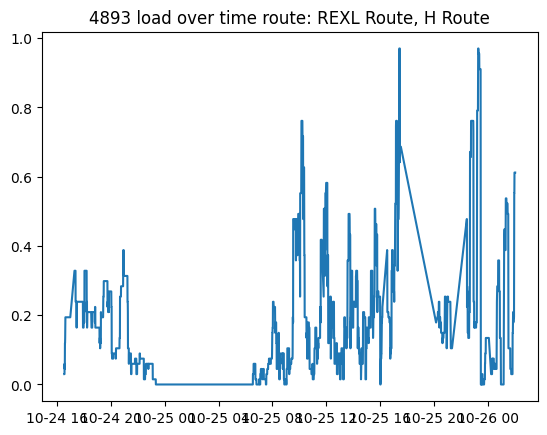

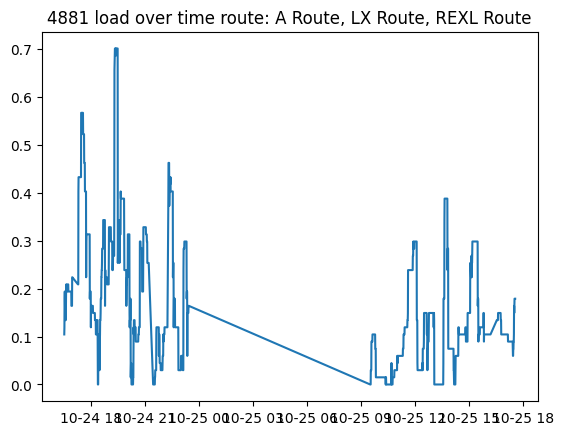

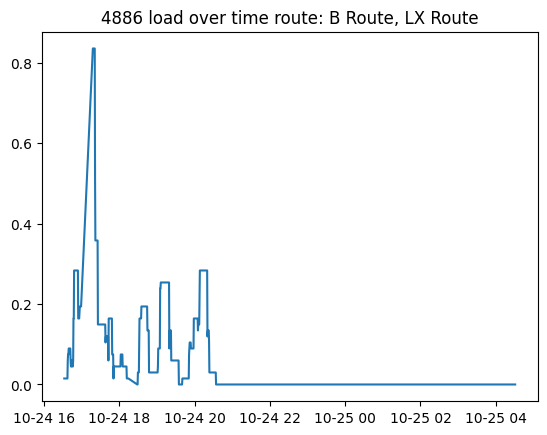

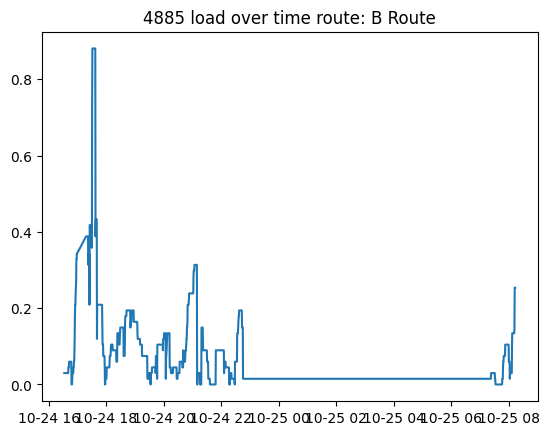

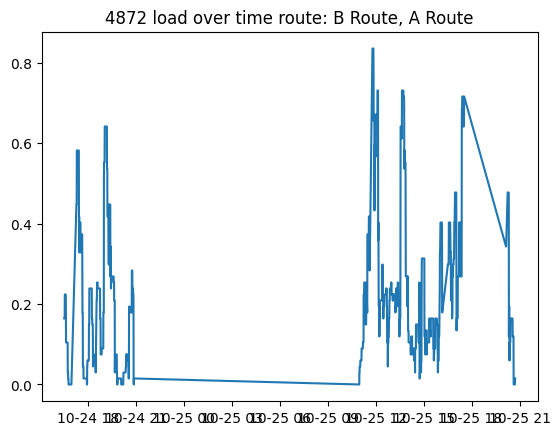

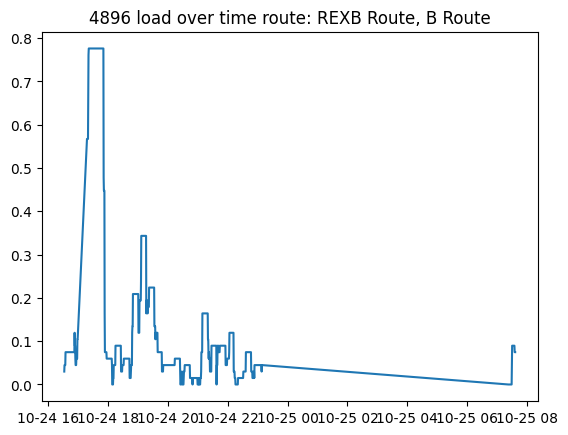

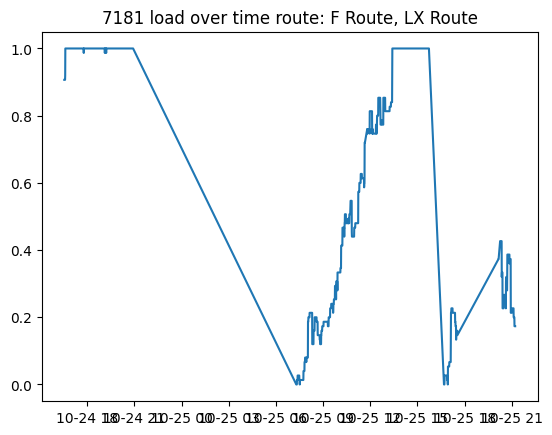

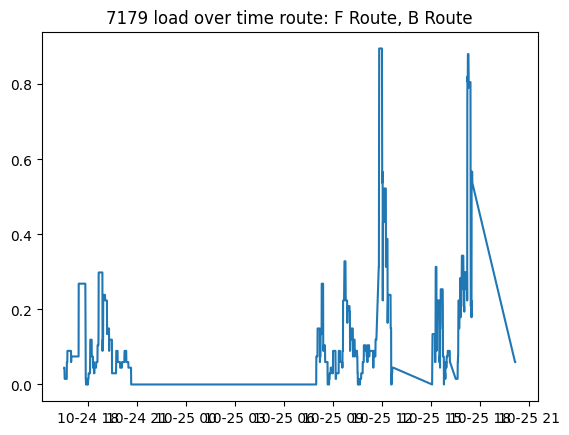

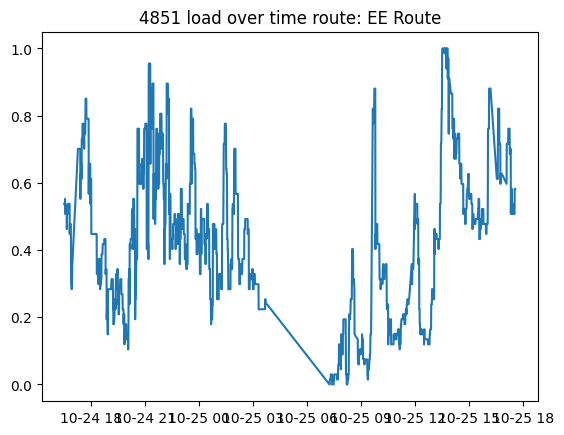

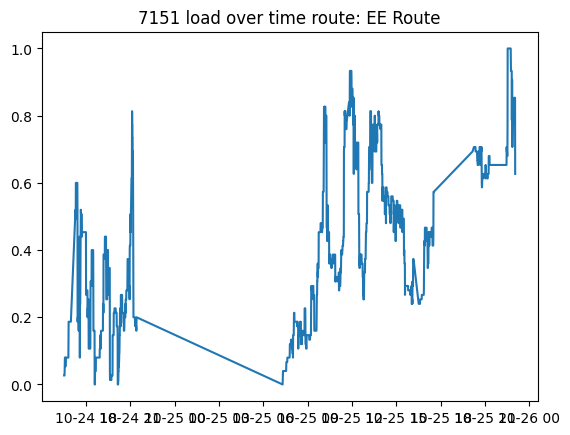

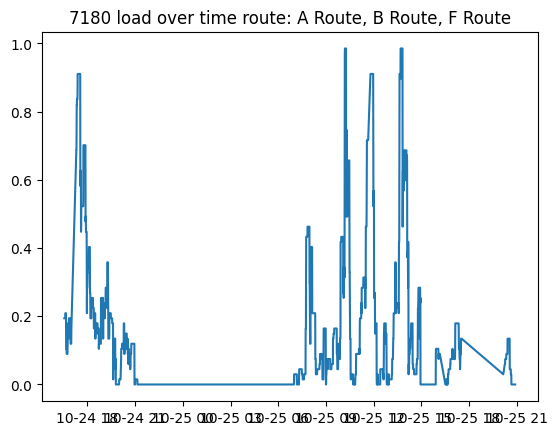

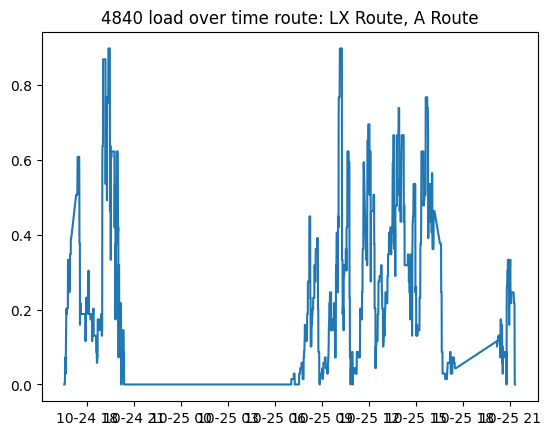

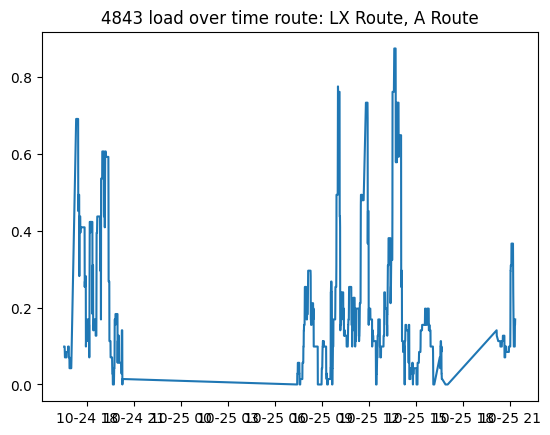

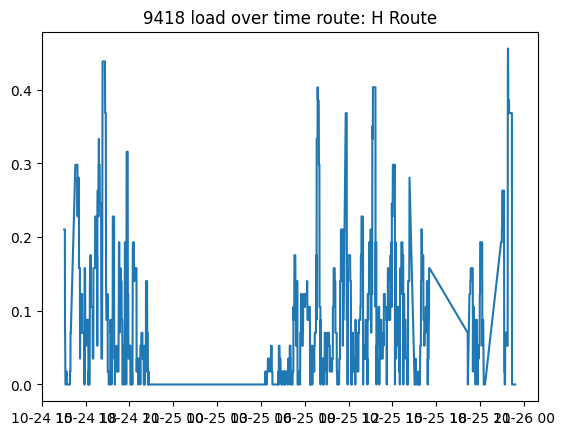

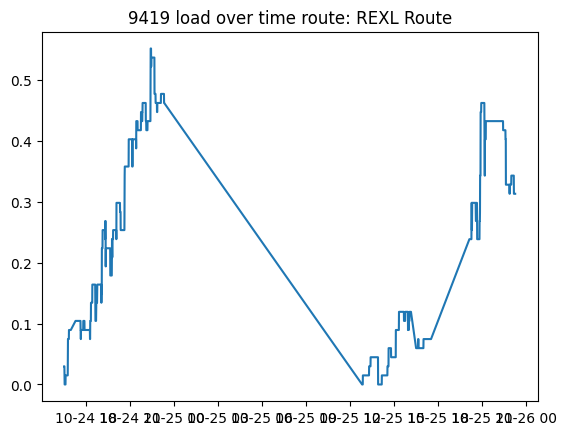

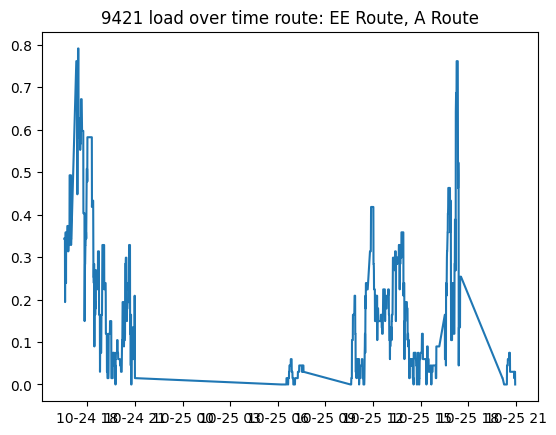

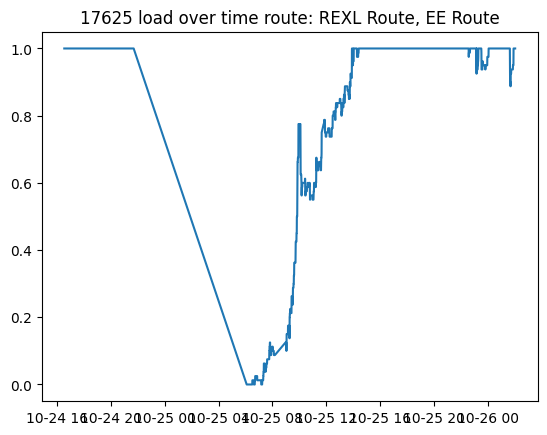

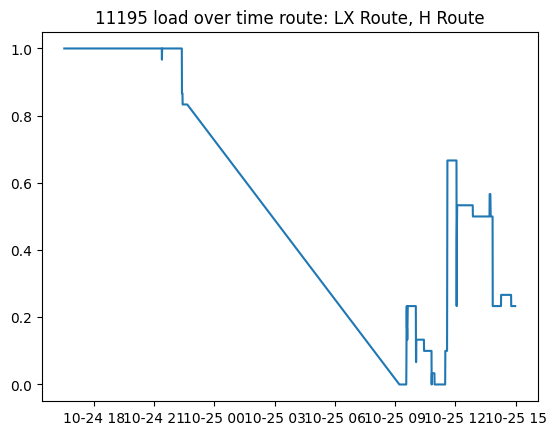

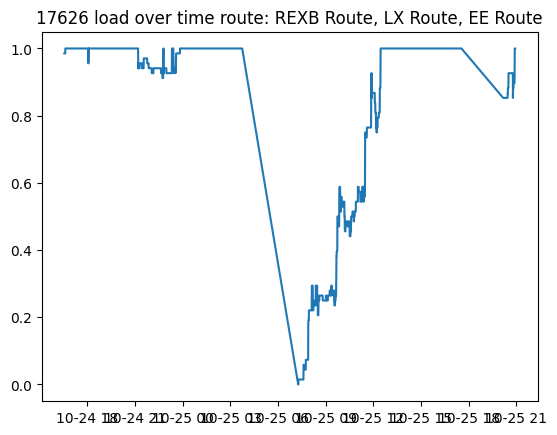

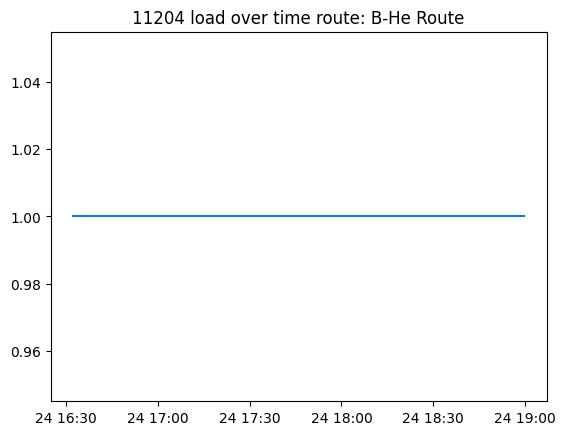

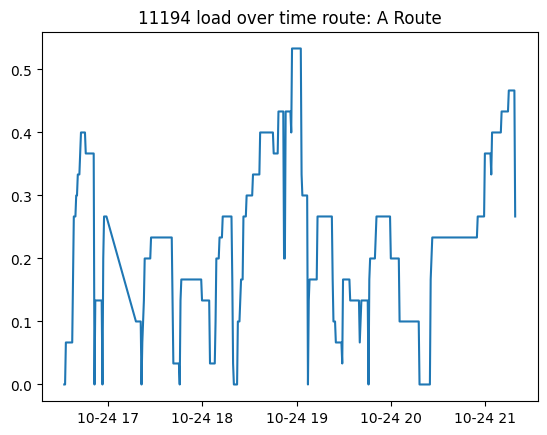

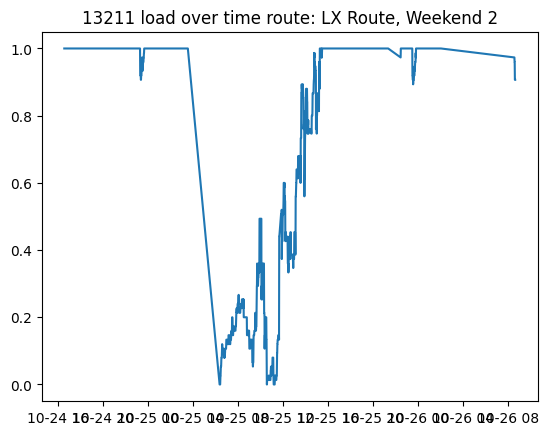

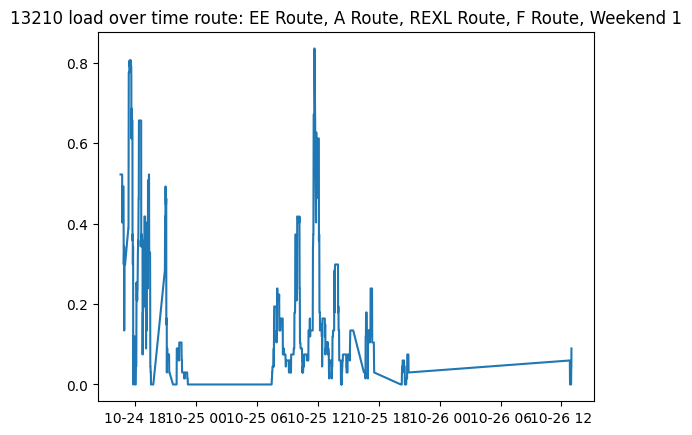

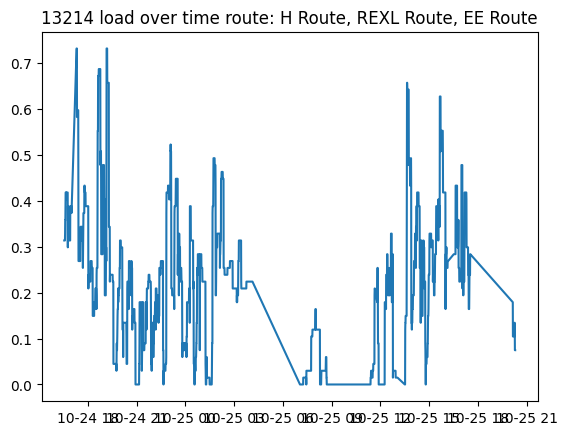

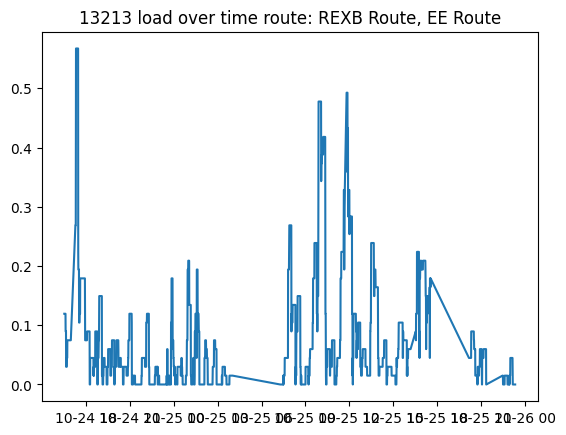

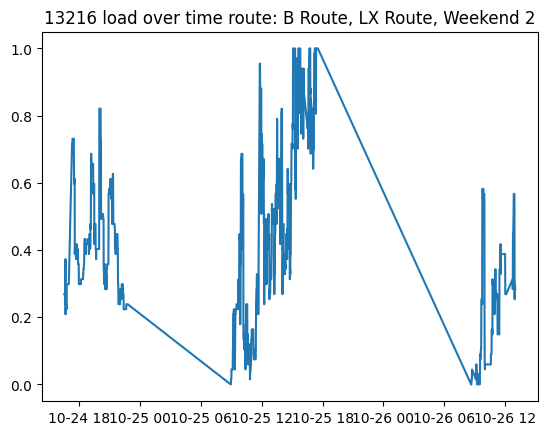

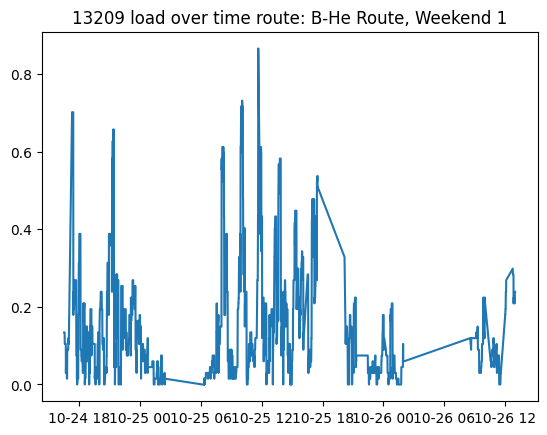

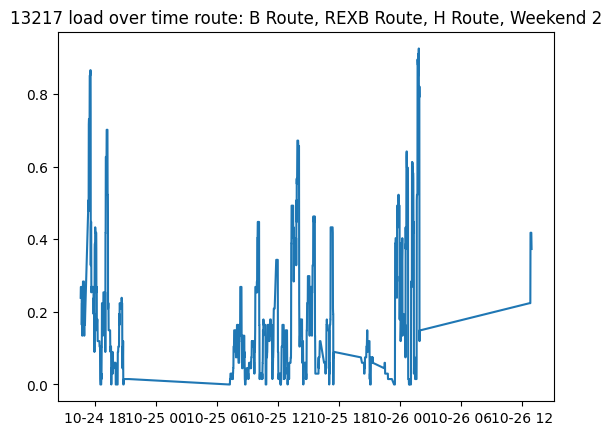

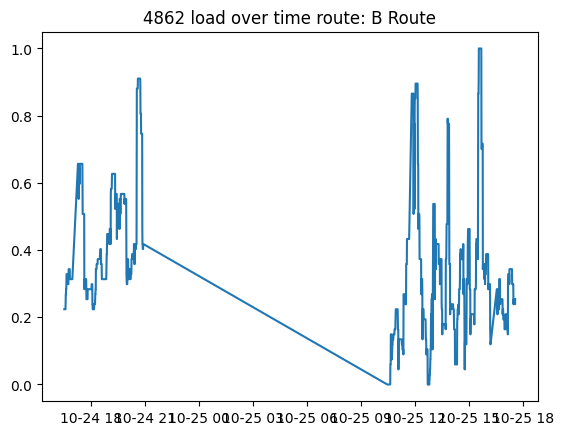

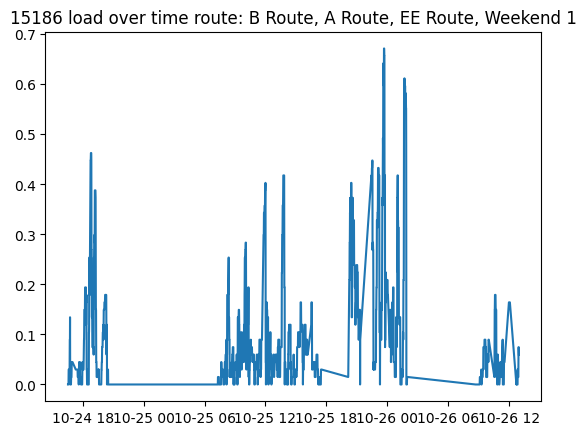

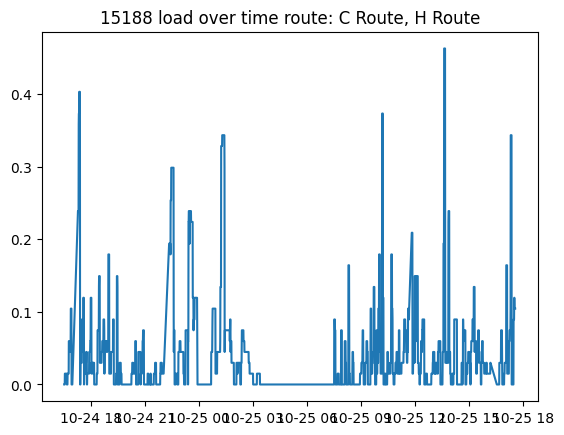

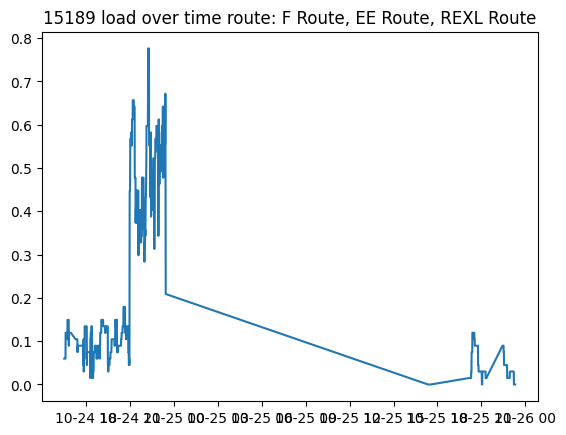

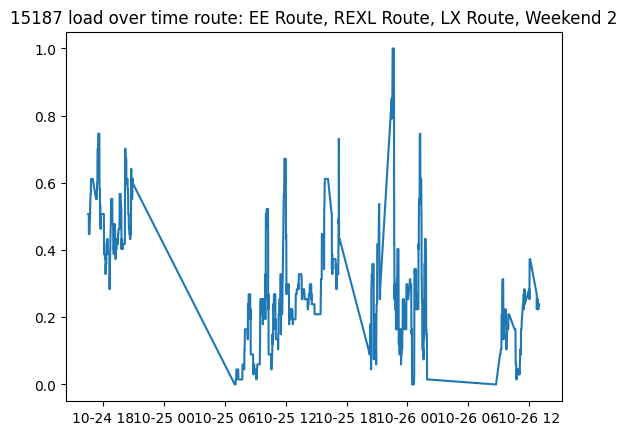

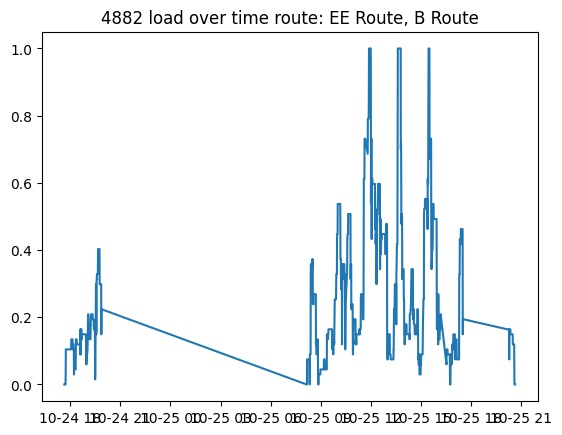

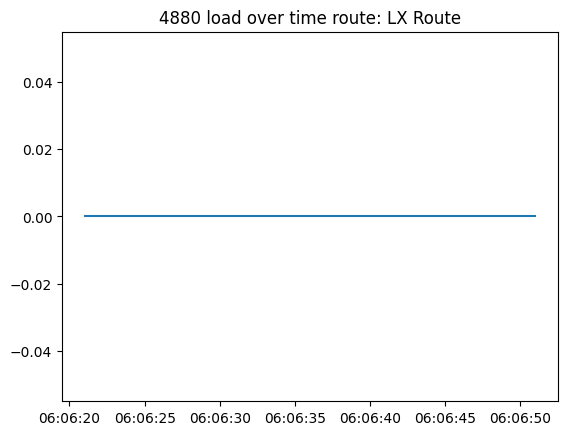

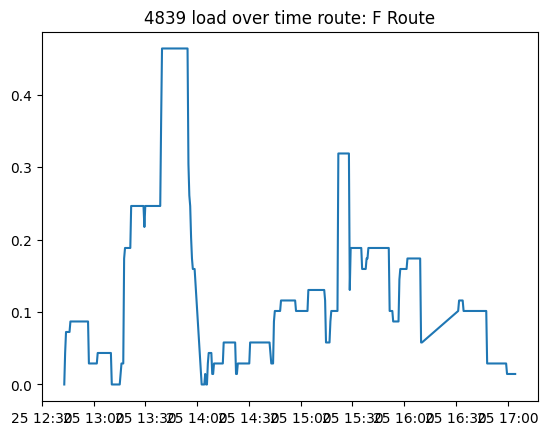

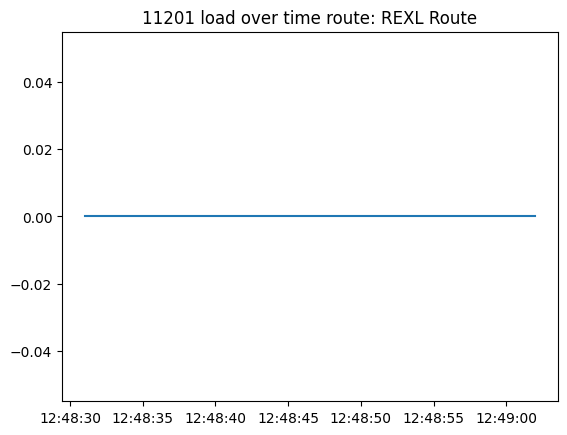

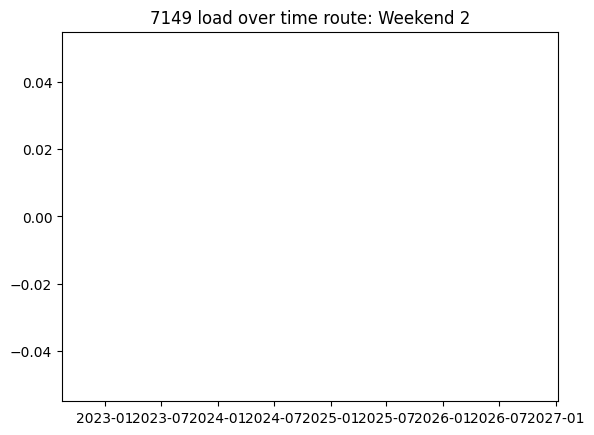

In [ ]:
for bus in data['id'].unique():
    data_bus = data[data['id'] == bus]
    plt.plot(data_bus['timestamp'], data_bus['load'], label=bus)
    plt.title(str(bus) + ' load over time' + ' route: ' + ', '.join(list(data_bus['routeName'].unique())))
    plt.show()

In [ ]:
bus_id = data['id'].unique()[2]

ROWS = 10000

data_bus = data[data['id'] == bus_id]
data_bus = data_bus.head(ROWS)

# You can then use these points for plotting or other operations
# For example, plot the interpolated points on a map using folium:
m = folium.Map(location=[data_bus['latitude'].mean(), data_bus['longitude'].mean()], zoom_start=13)
# for row in data_bus make a point for it
for index, row in data_bus.iterrows():
    folium.Marker([row['latitude'], row['longitude']], radius=2, color='blue', fill=True, fill_color='blue').add_to(m)

m

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.508980 -74.458824
1        40.523269 -74.442096
2        40.499168 -74.447682
3        40.520361 -74.436732
4        40.525290 -74.451439
5        40.503338 -74.452063
6        40.523944 -74.436476
7        40.517313 -74.454148
8        40.524670 -74.448705
9        40.503047 -74.447269
10       40.506037 -74.452932
11       40.516340 -74.455672
12       40.519813 -74.433554
13       40.499764 -74.445488
14       40.524921 -74.438781
15       40.521373 -74.450531
16       40.522194 -74.432753
17       40.512207 -74.458874
18       40.524069 -74.445375
19       40.501780 -74.450453
20       40.504102 -74.449196
21       40.526414 -74.454065
22       40.506542 -74.454275
23       40.523940 -74.439784
24       40.521615 -74.438968
25       40.516776 -74.431025
26       40.522737 -74.440846
27       40.518431 -74.452576
28       40.506900 -74.456066
29       40.501145 -74.445850
30       40.523680 -74.443719
31       4

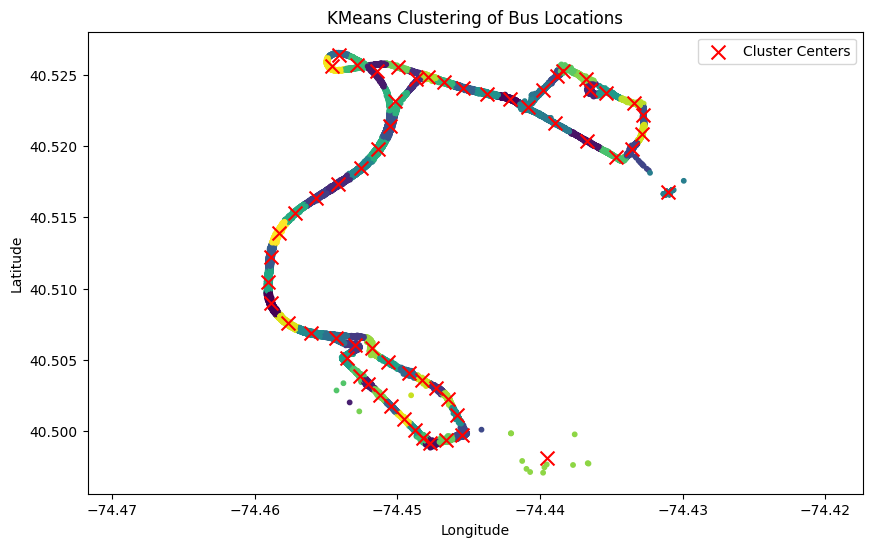

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.523883 -74.436472
1        40.525169 -74.454917
2        40.521959 -74.463443
3        40.524107 -74.445483
4        40.523585 -74.458043
5        40.517710 -74.456056
6        40.519921 -74.433466
7        40.524909 -74.448024
8        40.522170 -74.439977
9        40.517196 -74.460784
10       40.524477 -74.458807
11       40.525098 -74.438614
12       40.524927 -74.462310
13       40.524011 -74.450886
14       40.523999 -74.464203
15       40.523174 -74.441844
16       40.518301 -74.452960
17       40.522898 -74.433222
18       40.525542 -74.451563
19       40.523309 -74.465405
20       40.519490 -74.451725
21       40.519442 -74.462003
22       40.520425 -74.436848
23       40.525060 -74.455984
24       40.517289 -74.457592
25       40.524979 -74.463473
26       40.523540 -74.443057
27       40.525063 -74.460199
28       40.519626 -74.435418
29       40.525239 -74.457394
30       40.524683 -74.447294
31       4

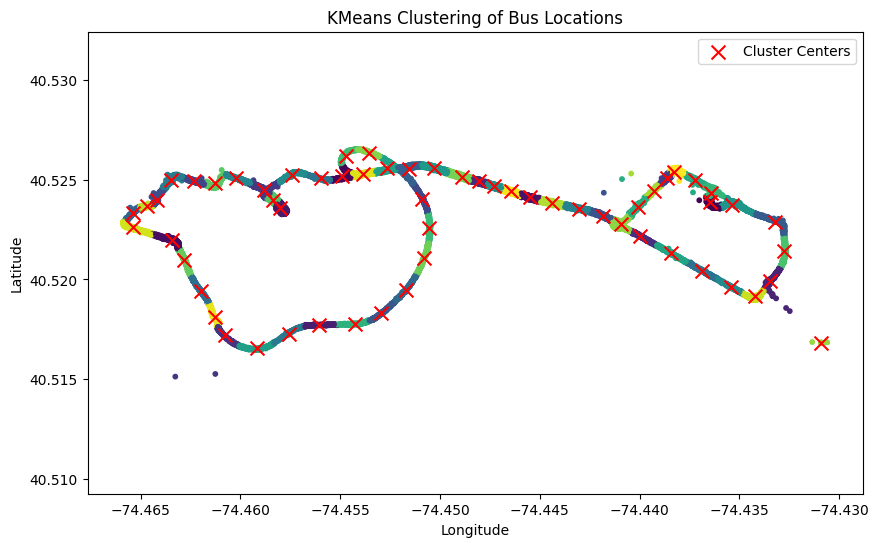

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.509531 -74.458958
1        40.486012 -74.438293
2        40.521831 -74.463297
3        40.500798 -74.442386
4        40.516095 -74.456126
5        40.481112 -74.436441
6        40.506067 -74.451280
7        40.493340 -74.439117
8        40.523568 -74.465229
9        40.482745 -74.437989
10       40.489109 -74.438033
11       40.518379 -74.461492
12       40.503473 -74.446831
13       40.487449 -74.439699
14       40.506847 -74.455775
15       40.496585 -74.439810
16       40.513257 -74.458614
17       40.516557 -74.459760
18       40.482014 -74.440107
19       40.516813 -74.454531
20       40.499592 -74.441042
21       40.506477 -74.453312
22       40.523333 -74.445991
23       40.501641 -74.443869
24       40.483245 -74.439009
25       40.491966 -74.438721
26       40.484660 -74.437637
27       40.520014 -74.462349
28       40.517248 -74.453048
29       40.505319 -74.449675
30       40.517453 -74.457124
31       4

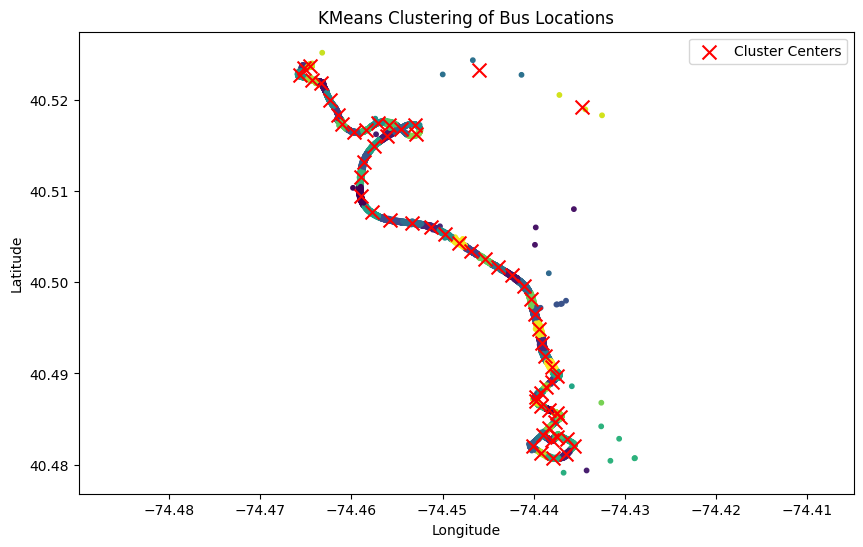

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.492192 -74.443100
1        40.479669 -74.433799
2        40.503643 -74.452377
3        40.483050 -74.437454
4        40.499393 -74.446516
5        40.482698 -74.430609
6        40.494682 -74.439326
7        40.487675 -74.440207
8        40.498328 -74.440764
9        40.503562 -74.446699
10       40.485223 -74.432041
11       40.504124 -74.449228
12       40.480943 -74.428993
13       40.485454 -74.437372
14       40.499578 -74.448236
15       40.481097 -74.436401
16       40.523299 -74.443616
17       40.489832 -74.441687
18       40.505325 -74.453530
19       40.500119 -74.444002
20       40.479308 -74.436554
21       40.480005 -74.432522
22       40.492928 -74.439575
23       40.500428 -74.442530
24       40.505876 -74.452294
25       40.484097 -74.434587
26       40.512336 -74.458835
27       40.502298 -74.450982
28       40.483604 -74.432540
29       40.486848 -74.439643
30       40.496646 -74.439888
31       4

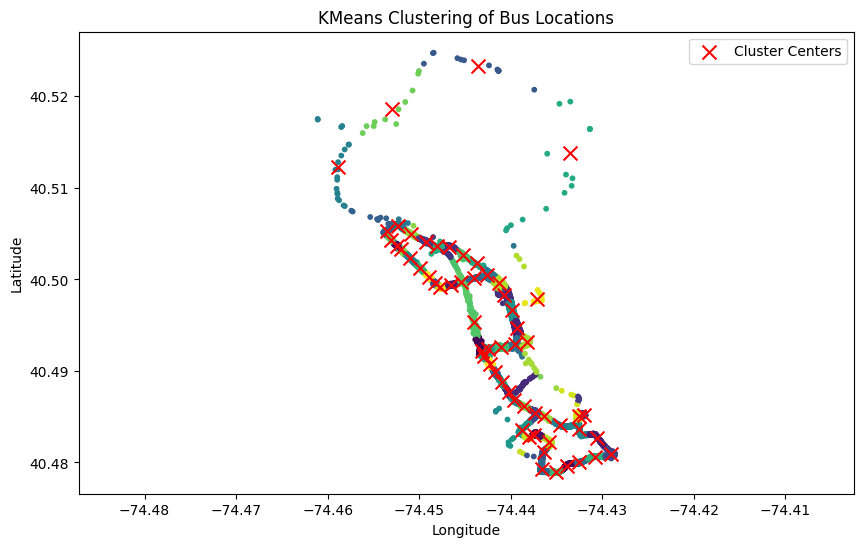

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.506090 -74.452825
1        40.520836 -74.462756
2        40.503099 -74.447352
3        40.523601 -74.458067
4        40.513470 -74.458532
5        40.514554 -74.466098
6        40.499569 -74.448222
7        40.517554 -74.461444
8        40.524501 -74.463885
9        40.517220 -74.457594
10       40.503266 -74.451981
11       40.506978 -74.456324
12       40.517154 -74.452880
13       40.499773 -74.445478
14       40.515435 -74.460676
15       40.515040 -74.463208
16       40.521451 -74.456920
17       40.509665 -74.458993
18       40.501245 -74.449903
19       40.518747 -74.459874
20       40.522882 -74.465416
21       40.525066 -74.460210
22       40.503633 -74.448329
23       40.516399 -74.459095
24       40.523932 -74.458385
25       40.523420 -74.442713
26       40.504145 -74.449282
27       40.511747 -74.458925
28       40.517413 -74.456077
29       40.505228 -74.453557
30       40.502337 -74.446506
31       4

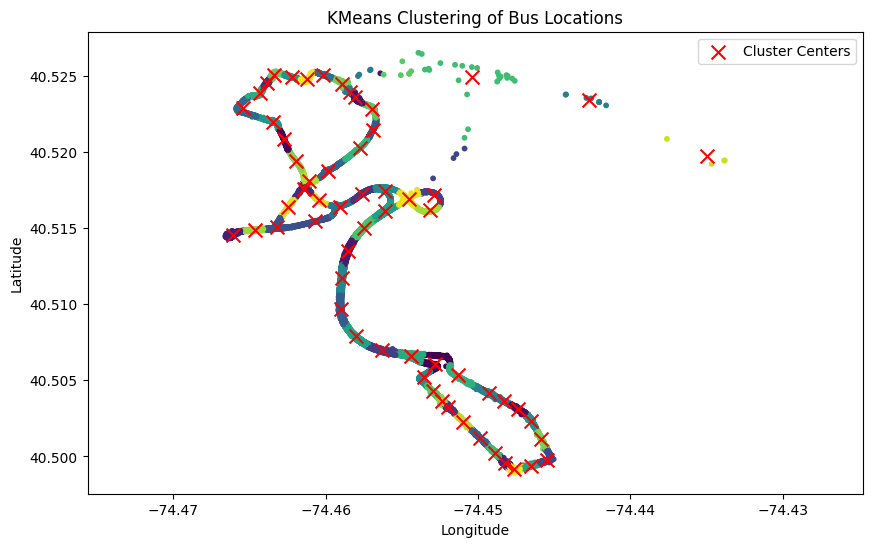

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.494944 -74.439435
1        40.520936 -74.437754
2        40.483059 -74.437462
3        40.516601 -74.455279
4        40.524815 -74.448866
5        40.506030 -74.451217
6        40.487737 -74.439399
7        40.525163 -74.438500
8        40.501297 -74.443315
9        40.510968 -74.459009
10       40.523899 -74.436493
11       40.525751 -74.452960
12       40.519490 -74.451559
13       40.523460 -74.442769
14       40.491331 -74.438401
15       40.485126 -74.437196
16       40.520775 -74.432950
17       40.500164 -74.441666
18       40.481113 -74.436467
19       40.503670 -74.447144
20       40.481953 -74.440001
21       40.524385 -74.446388
22       40.507678 -74.457751
23       40.522854 -74.441119
24       40.513119 -74.458633
25       40.505072 -74.449262
26       40.523303 -74.434223
27       40.489133 -74.438017
28       40.506860 -74.455829
29       40.517958 -74.453193
30       40.523118 -74.450098
31       4

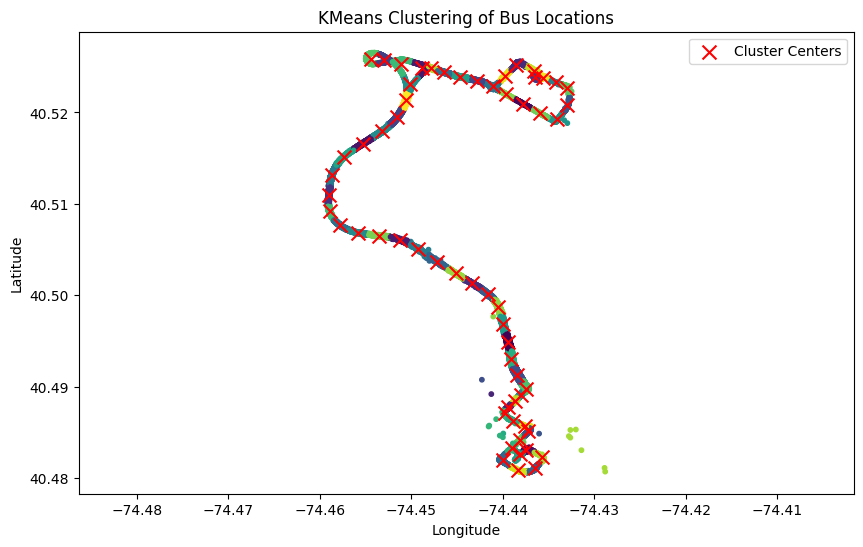

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.507444 -74.457436
1        40.523608 -74.458049
2        40.503309 -74.447719
3        40.516272 -74.459326
4        40.521841 -74.463279
5        40.503320 -74.452037
6        40.514554 -74.466097
7        40.517251 -74.452998
8        40.499449 -74.448091
9        40.505955 -74.453280
10       40.524972 -74.460999
11       40.523618 -74.465123
12       40.509986 -74.459042
13       40.519287 -74.434280
14       40.517722 -74.461243
15       40.517360 -74.455912
16       40.499764 -74.445507
17       40.504067 -74.449129
18       40.524516 -74.448997
19       40.520530 -74.457521
20       40.515111 -74.463336
21       40.512840 -74.458759
22       40.501252 -74.449911
23       40.518604 -74.459942
24       40.525072 -74.462868
25       40.505746 -74.451723
26       40.522466 -74.456833
27       40.505093 -74.453580
28       40.502491 -74.446634
29       40.524133 -74.458496
30       40.516902 -74.458118
31       4

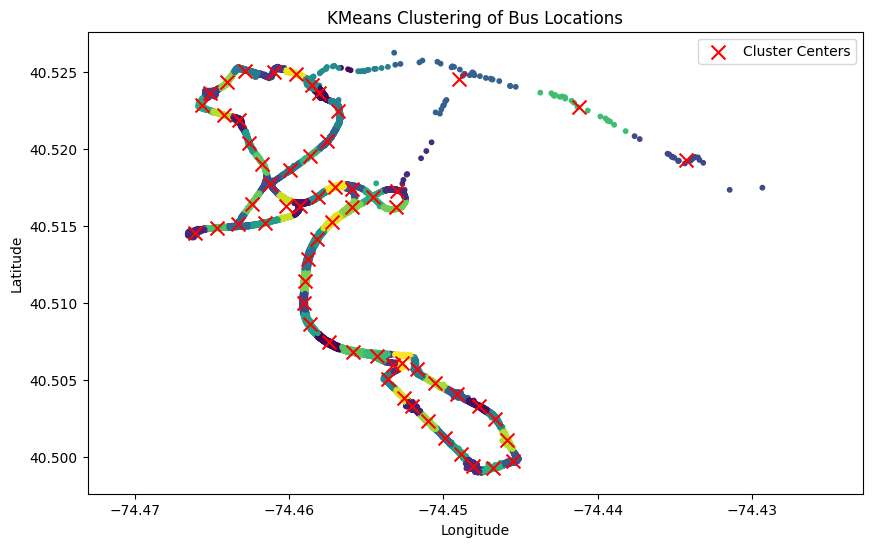

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.504354 -74.453067
1        40.487908 -74.439211
2        40.500142 -74.448782
3        40.482938 -74.437622
4        40.497769 -74.440224
5        40.504123 -74.449237
6        40.485205 -74.437131
7        40.499727 -74.445148
8        40.490185 -74.437736
9        40.495198 -74.439519
10       40.503680 -74.452410
11       40.481259 -74.439075
12       40.481136 -74.436422
13       40.503579 -74.446828
14       40.487014 -74.439808
15       40.499807 -74.441505
16       40.501733 -74.450397
17       40.505860 -74.452281
18       40.491789 -74.438670
19       40.491332 -74.442683
20       40.501520 -74.443367
21       40.482752 -74.439613
22       40.522565 -74.443456
23       40.486042 -74.438343
24       40.494766 -74.443906
25       40.499288 -74.446861
26       40.484033 -74.438295
27       40.489209 -74.437926
28       40.503616 -74.448101
29       40.481950 -74.440144
30       40.511668 -74.434799
31       4

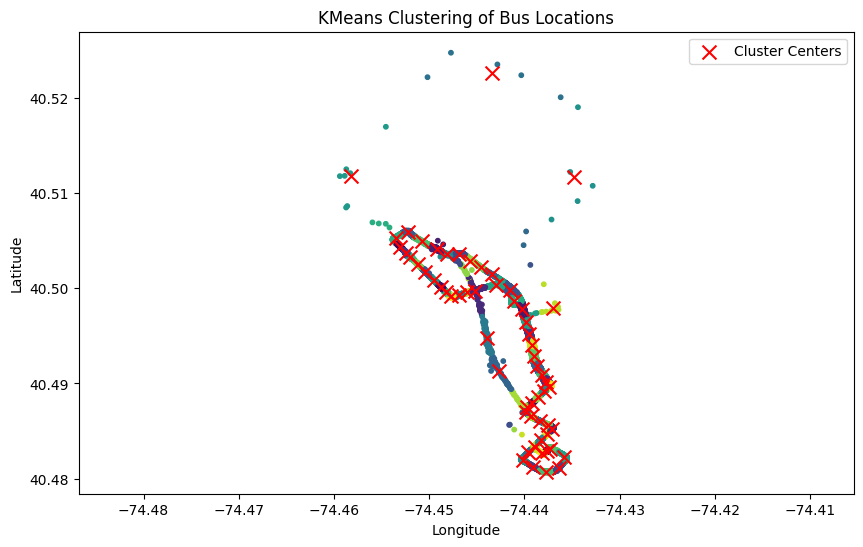

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.525206 -74.456524
1        40.524340 -74.436419
2        40.523590 -74.465149
3        40.524481 -74.446782
4        40.517595 -74.456863
5        40.519833 -74.433518
6        40.522769 -74.441041
7        40.523563 -74.458001
8        40.518324 -74.452338
9        40.521799 -74.463216
10       40.518124 -74.461450
11       40.525605 -74.451760
12       40.525260 -74.438457
13       40.522811 -74.433038
14       40.525118 -74.460376
15       40.523871 -74.449216
16       40.523921 -74.444837
17       40.521219 -74.438286
18       40.524825 -74.461184
19       40.516098 -74.453502
20       40.525241 -74.454004
21       40.521252 -74.450456
22       40.482718 -74.437795
23       40.524178 -74.439572
24       40.523399 -74.442355
25       40.525042 -74.463362
26       40.517036 -74.460679
27       40.524465 -74.458674
28       40.520325 -74.436682
29       40.519597 -74.435383
30       40.520084 -74.462386
31       4

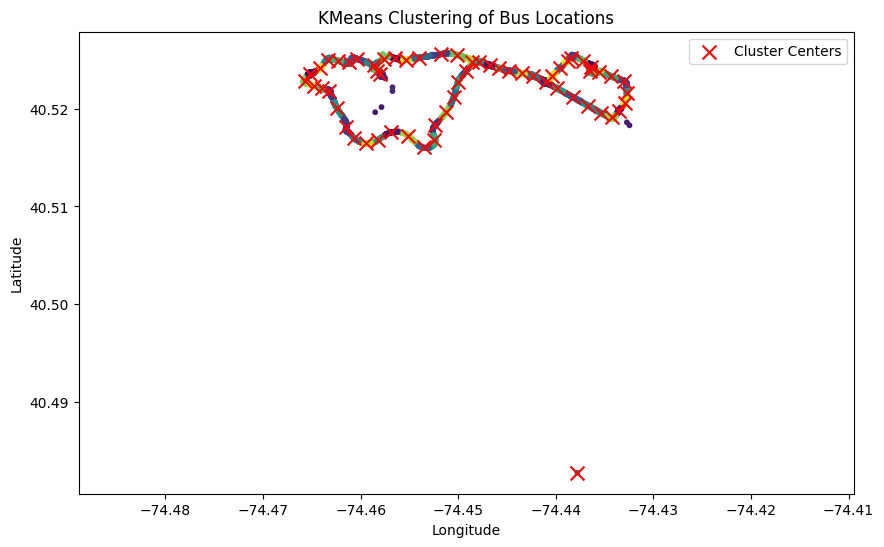

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.522889 -74.465781
1        40.515236 -74.463230
2        40.514473 -74.466150
3        40.521132 -74.462883
4        40.518668 -74.461527
5        40.520824 -74.437666
6        40.523646 -74.465111
7        40.481054 -74.436476
8        40.516875 -74.462107
9        40.522064 -74.463799
10       40.523527 -74.449541
11       40.520218 -74.462505
12       40.517271 -74.454706
13       40.517599 -74.461574
14       40.514842 -74.465081
15       40.523847 -74.464386
16       40.522294 -74.464533
17       40.521929 -74.463285
18       40.519594 -74.462132
19       40.514954 -74.463618
20       40.523440 -74.465363
21       40.516096 -74.462668
22       40.514736 -74.465767
23       40.522751 -74.441346
24       40.517776 -74.461228
25       40.524169 -74.446018
26       40.519316 -74.433929
27       40.515470 -74.460518
28       40.522429 -74.464965
29       40.514884 -74.464528
30       40.514422 -74.466422
31       4

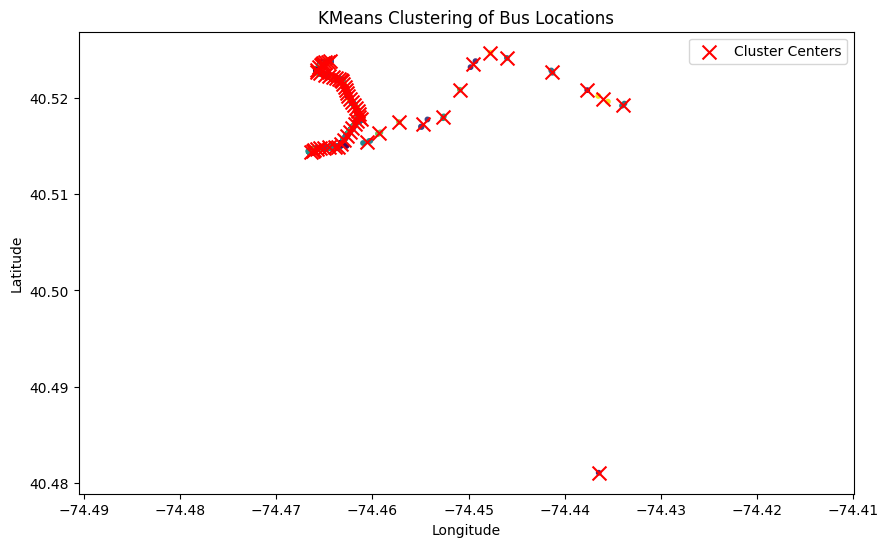

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.524784 -74.436855
1        40.489542 -74.446075
2        40.510621 -74.458990
3        40.523563 -74.458028
4        40.484114 -74.434230
5        40.500643 -74.449277
6        40.492021 -74.443000
7        40.524814 -74.448247
8        40.503338 -74.452046
9        40.521733 -74.463251
10       40.485403 -74.437295
11       40.516611 -74.456385
12       40.497346 -74.440448
13       40.480966 -74.429130
14       40.519773 -74.433605
15       40.523432 -74.442691
16       40.480005 -74.432602
17       40.481384 -74.436178
18       40.492527 -74.439036
19       40.504103 -74.449209
20       40.500839 -74.443335
21       40.524964 -74.460902
22       40.516792 -74.460005
23       40.506719 -74.455101
24       40.487236 -74.439682
25       40.483066 -74.438900
26       40.522742 -74.465432
27       40.485060 -74.432415
28       40.524077 -74.445424
29       40.505694 -74.452930
30       40.524101 -74.439636
31       4

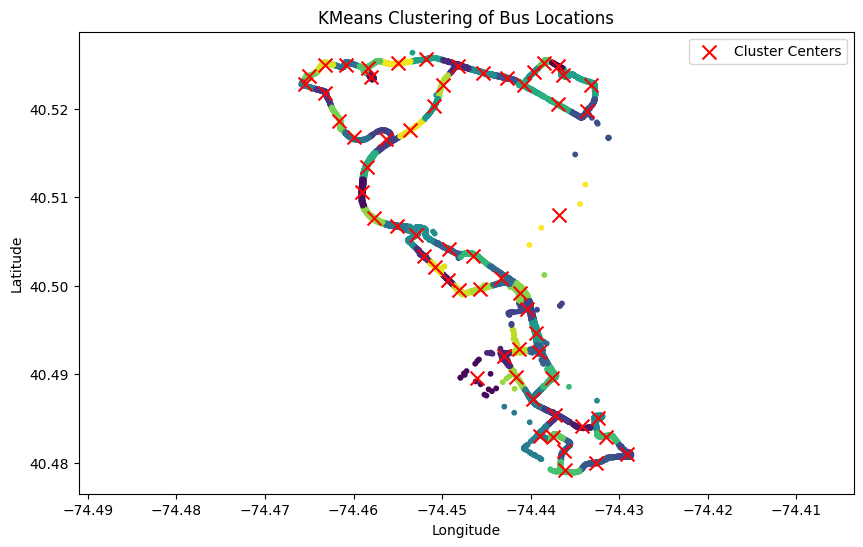

C:\Users\akash\AppData\Local\Temp\ipykernel_17816\1967332200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bus['cluster'] = kmeans.labels_


          latitude  longitude
cluster                      
0        40.523560 -74.458038
1        40.493111 -74.438859
2        40.523901 -74.436355
3        40.504488 -74.450035
4        40.484985 -74.432423
5        40.485429 -74.437305
6        40.512995 -74.458607
7        40.499518 -74.448119
8        40.524936 -74.448222
9        40.480906 -74.429125
10       40.524975 -74.463307
11       40.517045 -74.453947
12       40.479972 -74.432652
13       40.519738 -74.433813
14       40.522923 -74.441133
15       40.500179 -74.441639
16       40.489359 -74.441435
17       40.506017 -74.452361
18       40.481463 -74.436193
19       40.519213 -74.461868
20       40.503345 -74.452069
21       40.488254 -74.438925
22       40.525235 -74.451246
23       40.502479 -74.446153
24       40.504027 -74.449055
25       40.509286 -74.458825
26       40.483153 -74.438879
27       40.525516 -74.454332
28       40.495610 -74.439599
29       40.522905 -74.465357
30       40.525154 -74.438476
31       4

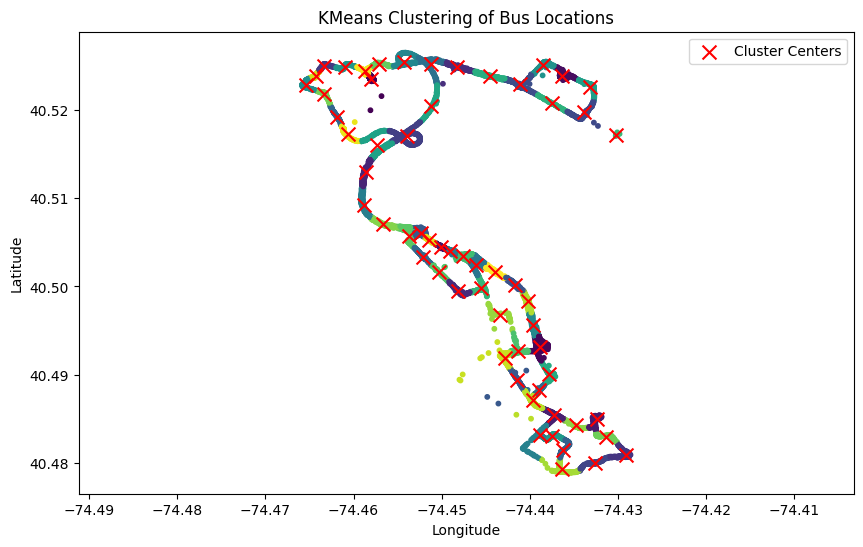

In [21]:
# prompt: make 30 clusters and show average position for points

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


for routeName in data['routeName'].unique():
    # Assuming 'data_bus' DataFrame from the previous code is available
    # get A Route data
    data_bus = data[data['routeName'] == routeName]

    # Prepare data for clustering
    X = data_bus[['latitude', 'longitude']]

    # Perform KMeans clustering with 30 clusters
    kmeans = KMeans(n_clusters=60, random_state=0).fit(X)

    # Get cluster labels for each data point
    data_bus['cluster'] = kmeans.labels_

    # Calculate the average position for each cluster
    average_positions = data_bus.groupby('cluster').agg({'latitude': 'mean', 'longitude': 'mean'})

    # store the cluster centers in a file with an id
    average_positions.to_csv(f'clusters/{routeName}.csv')

    # Print the average positions
    print(average_positions)

    # Visualize clusters and average positions
    plt.figure(figsize=(10, 6))
    plt.scatter(data_bus['longitude'], data_bus['latitude'], c=data_bus['cluster'], cmap='viridis', s=10)
    plt.scatter(average_positions['longitude'], average_positions['latitude'], marker='x', s=100, c='red', label='Cluster Centers')
    plt.title('KMeans Clustering of Bus Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    plt.legend()
    plt.show()